# Experiments


This notebook contains all possible steps to run and produce the tables and plots for the paper.
To set up experiments use the following command

In [10]:
!make setup

/home/alexander/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/alexander/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/alexander/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package).

In [ ]:
! make reproduce

## Greater reduction power

In this section we focus only on the results for the experiments that show a greater reduction power.
It is possible to run only the experiments related to greater reduction power, with the following command.


In [ ]:
! make all

/home/alexander/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/alexander/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/alexander/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package).

### Main Table

The following cells compute the averages of the runs provided the file `compilation.csv` exists.

In [1]:
import pandas as pd
import re

In [2]:
def remove_pattern(og, pattern):
    result = re.sub(pattern, "", og)
    return result

def get_df():
    p_path = '/home/alexander/clue/papers/numerical/'
    
    comp = lambda x: 'compilation_'+str(x)+'.csv'
    
    comp(1)
    df = pd.read_csv(p_path+comp(1), sep=';')
    
    for i in range(2,6):
        aux_df = pd.read_csv(p_path+comp(i), sep=';')
        df = pd.concat([df, aux_df])
        
    df['modelName'] = df.apply(lambda x:  x['modelName']+"_"+str(x['nlum_size']), axis=1)
    
    
    pattern = r"_\[e=.*\]"
    df['modelName'] = df.apply(lambda x: remove_pattern(x['modelName'], pattern), axis=1)

    types = {'paper/polynomial': 1, 'paper/rational': 2}
    df['type'] = df.apply(lambda x:  types[x['type']], axis=1)
    return df
# df

In [6]:
df2 = get_df()
# df.head()
df2 = df2.groupby("modelName").mean()

cols_drop = [ 'maxPerturbation', 'max_deviation', 'norm_x0', 'compactum_bound', 'max_allowed_slope','norm_fx0', '|M*xt|_2', 'tolerance', 't0', 't1']
df2.insert(5, 'eps_ratio', df2['epsilon']/df2['max_epsilon']*100)
df2.insert(5, 'red_ratio', df2['nlum_size']/df2['size']*100)

df2 = df2.reset_index()
pattern = r"_.*_\d+"
df2['modelName'] = df2.apply(lambda x: remove_pattern(x['modelName'], pattern), axis=1)
df2 = df2.sort_values(by=['type',  'modelName', 'nlum_size'],ascending=[True, True, False] ).drop(columns=cols_drop)
df2 = df2.round({ 'red_ratio':1, 'avg_err':3, 'avg_per_err':3, 'secThisEpsilon':2, 'secTotal': 3})
int_cols = ['size', 'clum_size', 'nlum_size','consideredEpsilons'] 
for col in int_cols:
    df2[col]= pd.to_numeric(df2[col], downcast='integer')

str_cols = ['red_ratio','secTotal']
for col in str_cols:
    df2[col]=df2[col].astype("string")
pd.option_context('display.precision', 3)
# cols_ordered = ['modelName',
#                 'type', 
#                 'size',
#                 'clum_size',           
#                 'nlum_size',
#                 'et_rel',
#                 'et',               
#                 'avg_per_err',
#                 'avg_err',
#                 'max_err',
#                 'epsilon',
#                 'max_epsilon',               
#                 'consideredEpsilons',
#                 't0',
#                 't1',
#                 'secThisEpsilon',
#                 'secTotal',
#  ]
# df2 = df2[cols_ordered]
# df2.insert(5, 'red_ratio', df2['nlum_size']/df2['size'])
# df2=df2.round({'eps_ratio':3, 'red_ratio':2, 'avg_err':3, 'avg_per_err':3, 'secThisEpsilon':2, 'secTotal': 2})
to_show = ['modelName', 'nlum_size','consideredEpsilons', 'secThisEpsilon', 'secTotal']
to_print = ['modelName', 'nlum_size','red_ratio', 'et_rel', 'et','max_err', 'epsilon', 'max_epsilon', 'eps_ratio', 'consideredEpsilons', 'secTotal']
# df2[to_show]

df_print = df2[to_print]
df_print
# df_print=df_print.round({'red_ratio':3, 'avg_err':3, 'et_rel':3,'et':3, 'max_err':3,'epsilon':3, 'max_epsi  'secTotal': 2})

,modelName,nlum_size,red_ratio,et_rel,et,max_err,epsilon,max_epsilon,eps_ratio,consideredEpsilons,secTotal
1,BIOMD102,11,84.6,1.160673e+01,1.439831e+02,143.983125,4.242678e-04,3.517815e-03,1.206055e+01,13,0.284
4,BIOMD102,8,61.5,4.864985e+00,6.035082e+01,67.759299,9.953975e-04,3.517815e-03,2.829590e+01,13,0.099
3,BIOMD102,6,46.2,1.255344e+00,1.557272e+01,73.948641,1.727131e-03,3.517815e-03,4.909668e+01,13,0.138
2,BIOMD102,2,15.4,1.499819e+01,1.860547e+02,186.054666,1.971042e-03,3.517815e-03,5.603027e+01,13,0.046
0,BIOMD102,1,7.7,1.501177e+01,1.862231e+02,186.223098,3.517815e-03,3.517815e-03,1.000000e+02,13,0.052
6,BIOMD103,14,82.4,1.024138e-02,1.719293e+00,1.719293,9.893856e-04,3.517815e-03,2.812500e+01,13,0.598
5,BIOMD103,12,70.6,9.248811e-01,1.552664e+02,156.657188,1.603457e-03,3.517815e-03,4.558105e+01,13,0.288
8,BIOMD103,7,41.2,8.521447e-01,1.430556e+02,143.536909,1.641246e-03,3.517815e-03,4.665527e+01,13,0.218
7,BIOMD103,2,11.8,1.821732e-01,3.058271e+01,30.582706,1.995948e-03,3.517815e-03,5.673828e+01,13,0.07
13,BIOMD447,11,84.6,1.331893e-03,2.021409e-05,0.000020,4.950469e-03,2.450002e+01,2.020597e-02,26,0.173


In [8]:
headers = ['modelName', 'Red. size','Red. ratio[\%]', '$e_Rel(T)$', '$e(T)$','$e_max$', '$\\varepsilon$', "$\\varepsilon_max$","$\\varepsilon_Rel$", 'Iter.', 'Time [s]']
formatter = {'red_ratio': '{:.2f}'.format}
form = lambda x: formatter.get(x,'{:.2E}'.format)
df_print.to_latex(buf= '/home/alexander/Dropbox/Approximate CLUE/2023-Extension/table.tex',header=headers, index=False,
                  float_format='{:.2E}'.format
                 )

/home/alexander/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Simulation Plots

The following cells generate the plots for all simulations that show the greater reducing power of approximate constrained lumping

In [6]:
import os

def list_json_files(directory):
    try:
        files = [f for f in os.listdir(directory) if f.endswith('.json')]
        files.sort()
        return files
    except FileNotFoundError:
        return f"Directory {directory} not found."
    except Exception as e:
        return f"An error occurred: {e}"

simulations_path = './paper/simulations/'



simulations = list_json_files(simulations_path)
print(simulations)


['BioNetGen_CCP[r=p,m=p][D13PG#10].json', 'BioNetGen_CCP[r=p,m=p][D13PG#30].json', 'NIHMS80246_S6[r=p,m=p][S2P#1].json']


In [19]:
import json

dict_to_plot = {}

for sim in simulations:
    with open(simulations_path+sim, 'r') as f:
        sim_dict = json.load(f)
    name = sim_dict['name']
    if name not in dict_to_plot.keys():
        plot_data = {
            't': sim_dict['t'],
            'exact': sim_dict['y'][0],
            'sizes': [sim_dict['exact_size'], sim_dict['lumped_size']],
            'nums': [(sim_dict['exact_size'],sim_dict['y'][0]),(sim_dict['lumped_size'],sim_dict['y'][1]) ]
        }
        init_dict = {
            'observable':sim_dict['observable'],
            'to_plot': plot_data,
        }
        dict_to_plot[name] = init_dict
    else:
        if sim_dict['lumped_size'] not in dict_to_plot[name]['to_plot']['sizes']:
            dict_to_plot[name]['to_plot']['nums'].append((sim_dict['lumped_size'],sim_dict['y'][1]))
            dict_to_plot[name]['to_plot']['sizes'].append(sim_dict['lumped_size'])
        # else:
            # print(f"Simulation of size {sim_dict['lumped_size']} already found")
        # dict_to_plot[name]['to_plot']['sizes'].append()
    
dict_to_plot['BioNetGen_CCP']['to_plot']['nums'].sort(reverse=True)
for x,y in dict_to_plot['BioNetGen_CCP']['to_plot']['nums']:
    print(x)

# Add figure 1 
dict_to_plot['IntroPlot'] = dict_to_plot['NIHMS80246_S6']

fig1_sizes = [ 24, 19, 14, 8] 
dict_to_plot['IntroPlot']['to_plot']['nums'].insert(0, (24,dict_to_plot['IntroPlot']['to_plot']['nums'][0][1]))
fig1_to_plot = [ x for x in dict_to_plot['IntroPlot']['to_plot']['nums'] if x[0] in fig1_sizes]
dict_to_plot['IntroPlot']['to_plot']['nums'] = fig1_to_plot
dict_to_plot['IntroPlot']['to_plot']['sizes'] = fig1_sizes

30
10


In [22]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

def make_plot(simulations, name,modelName=None, savefig = 0, path = None,linewidth=1.5):
    simulations['sizes'].sort(reverse=True)
    simulations['nums'].sort(reverse=True)
    plt.rcParams['font.size'] = 30
    plt.rcParams['text.usetex'] = True
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['savefig.dpi'] = 300
    fig = plt.figure(figsize=(4, 4))

    lines = ["--","-.",":"]
    linecycler = cycle(lines)
    # labels = simulations['sizes']
    labels = []
    
    fig = plt.figure()
    ax = plt.subplot(111)
    # linewidth=2
    if name == 'S6p':
        print('fixing time')
        X = [ x*10**6 for x in simulations['t'] ]
    else:
        X = simulations['t']
    for i,(lab,Y) in enumerate(simulations['nums']):
        labels.append(lab)
        # Y = result.y.transpose()

        if i == 0: 
            ax.plot(X,Y,linewidth=linewidth)
            # leg.append(labels[i])
        
        else:
            ax.plot(X,Y,next(linecycler),linewidth=linewidth)
            # leg.append(labels[i])

    xlims = [0, X[-1]]
    ax.set_xlim(xlims)
    ax.set_xlabel(r't')
    # plt.legend(['x', 'y'], shadow=True)
    ylabel = name
    ax.set_ylabel(''+ylabel+'')
    ax.legend(labels,loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=1)

    
    if savefig and path is not None:
        # path = '/home/alexander/Dropbox/Approximate CLUE/presentation/beamer/'
        figname = path + modelName +'_'+ylabel+'.png'
        print(f"Saving figure to {figname}")
        plt.savefig(figname, bbox_inches='tight',pad_inches=0.2)
    plt.show()    

def plot_from_model(model,savefig=0):
    path = '/home/alexander/Dropbox/Approximate CLUE/2023-Extension/img/sims/'
    make_plot(dict_to_plot[model]['to_plot'],
              dict_to_plot[model]['observable'],
              modelName=model,
              path= path, linewidth=6, savefig=savefig)



Saving figure to /home/alexander/Dropbox/Approximate CLUE/2023-Extension/img/sims/BIOMD102_C3.png


<Figure size 1200x1200 with 0 Axes>

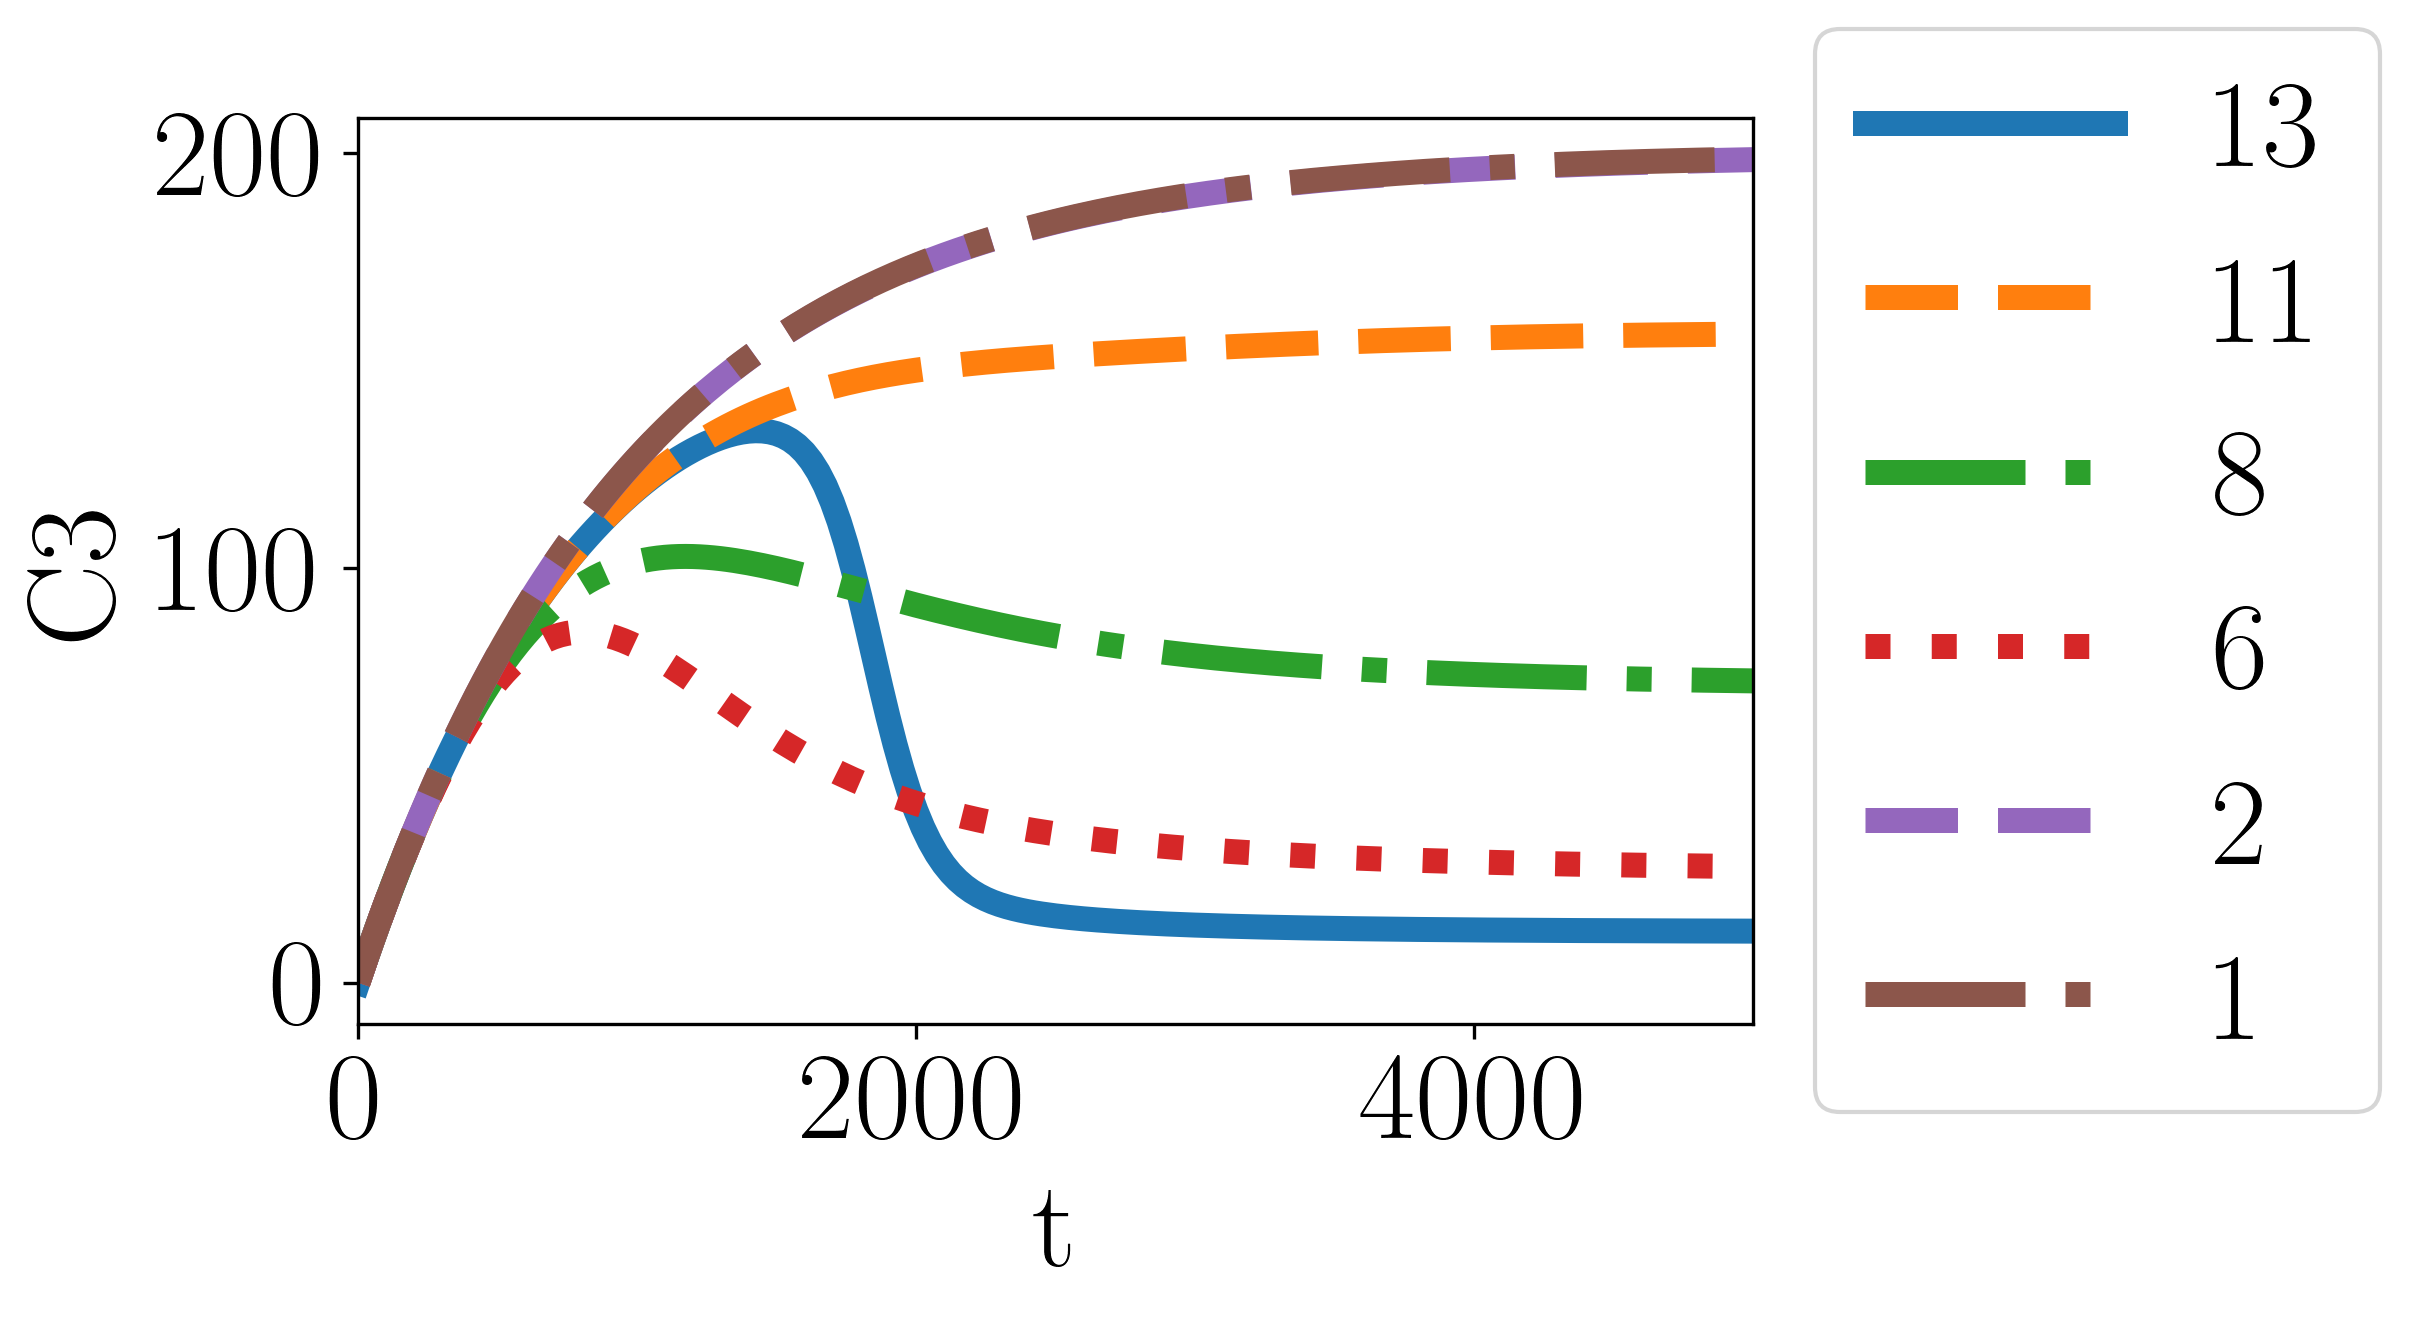

Saving figure to /home/alexander/Dropbox/Approximate CLUE/2023-Extension/img/sims/BIOMD103_C3.png


<Figure size 1200x1200 with 0 Axes>

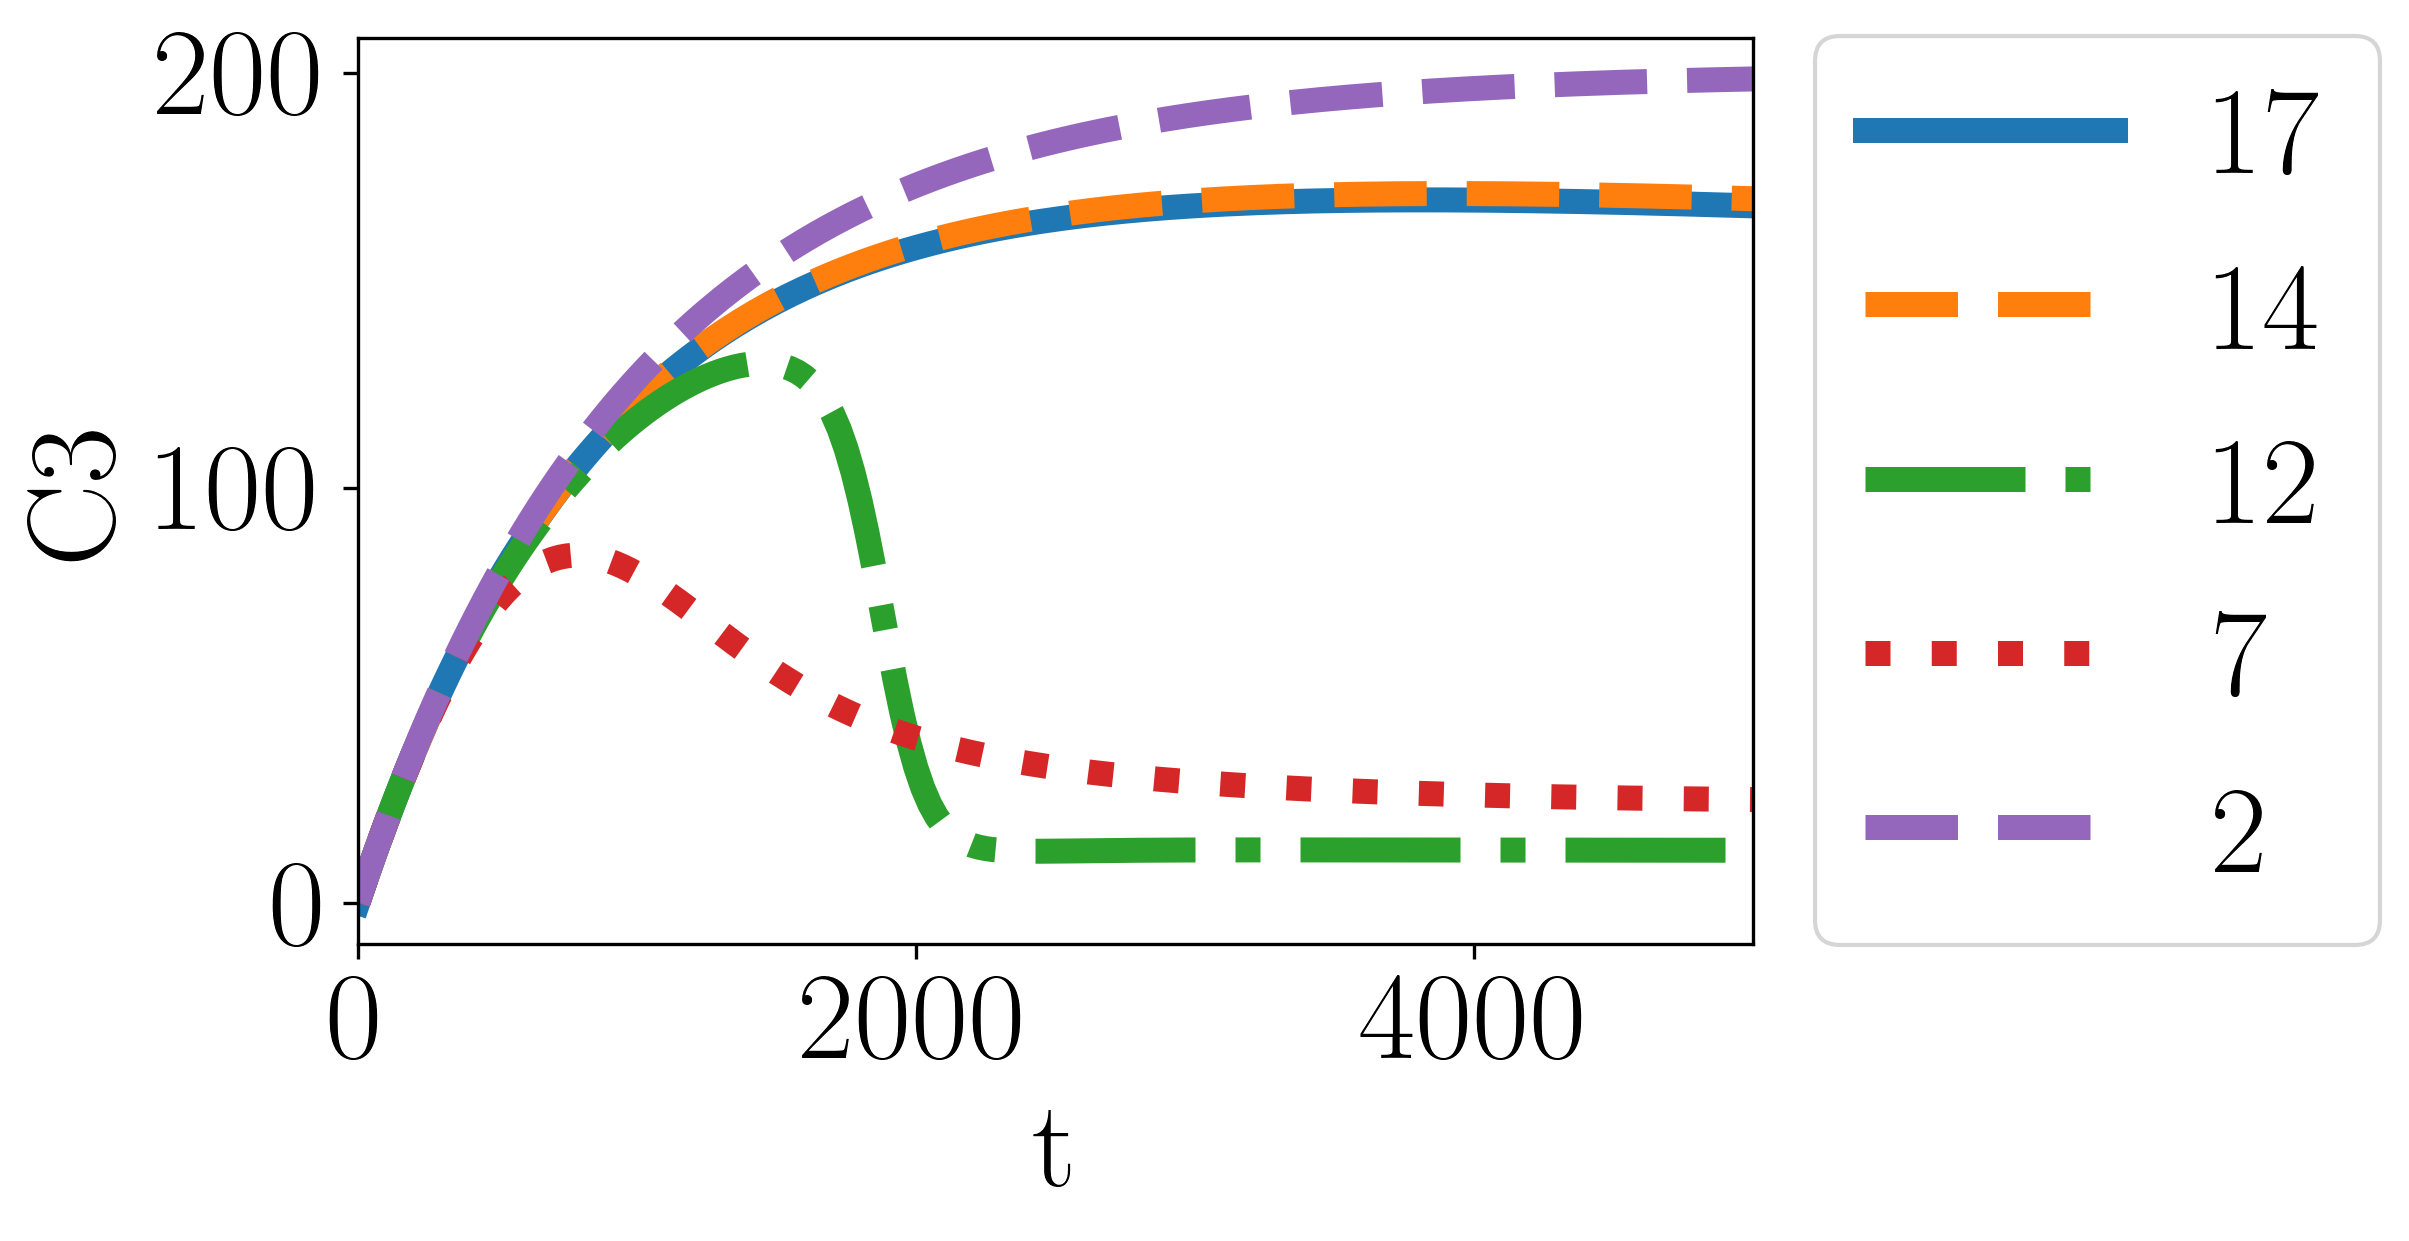

Saving figure to /home/alexander/Dropbox/Approximate CLUE/2023-Extension/img/sims/BIOMD437_frq_mRNA.png


<Figure size 1200x1200 with 0 Axes>

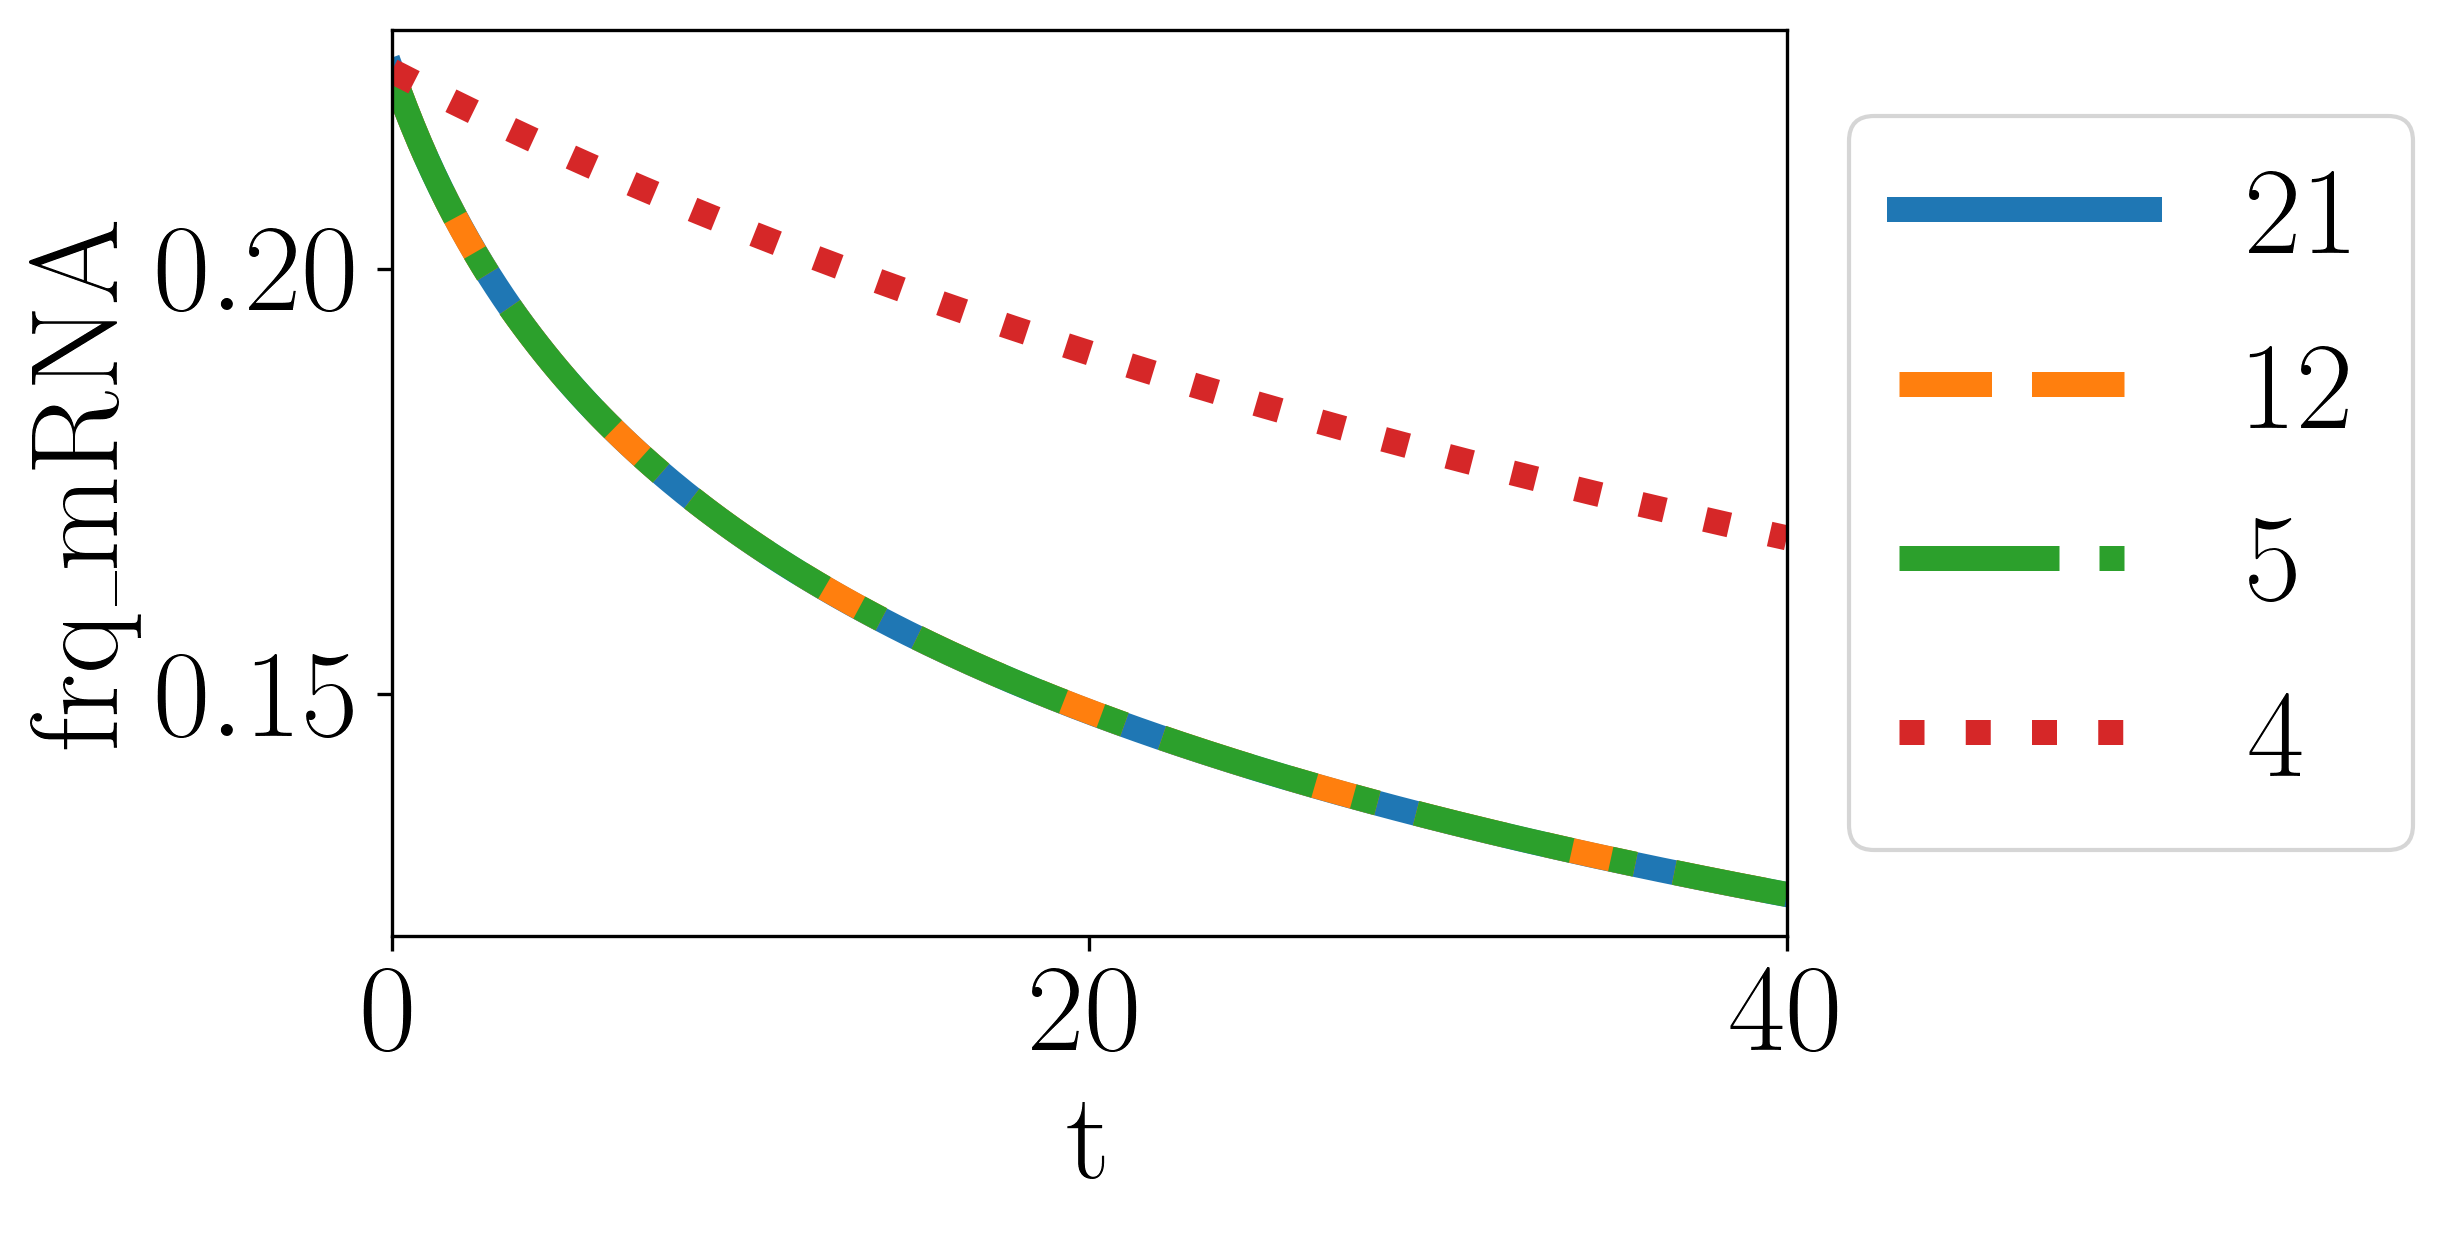

Saving figure to /home/alexander/Dropbox/Approximate CLUE/2023-Extension/img/sims/BIOMD447_TGFb1.png


<Figure size 1200x1200 with 0 Axes>

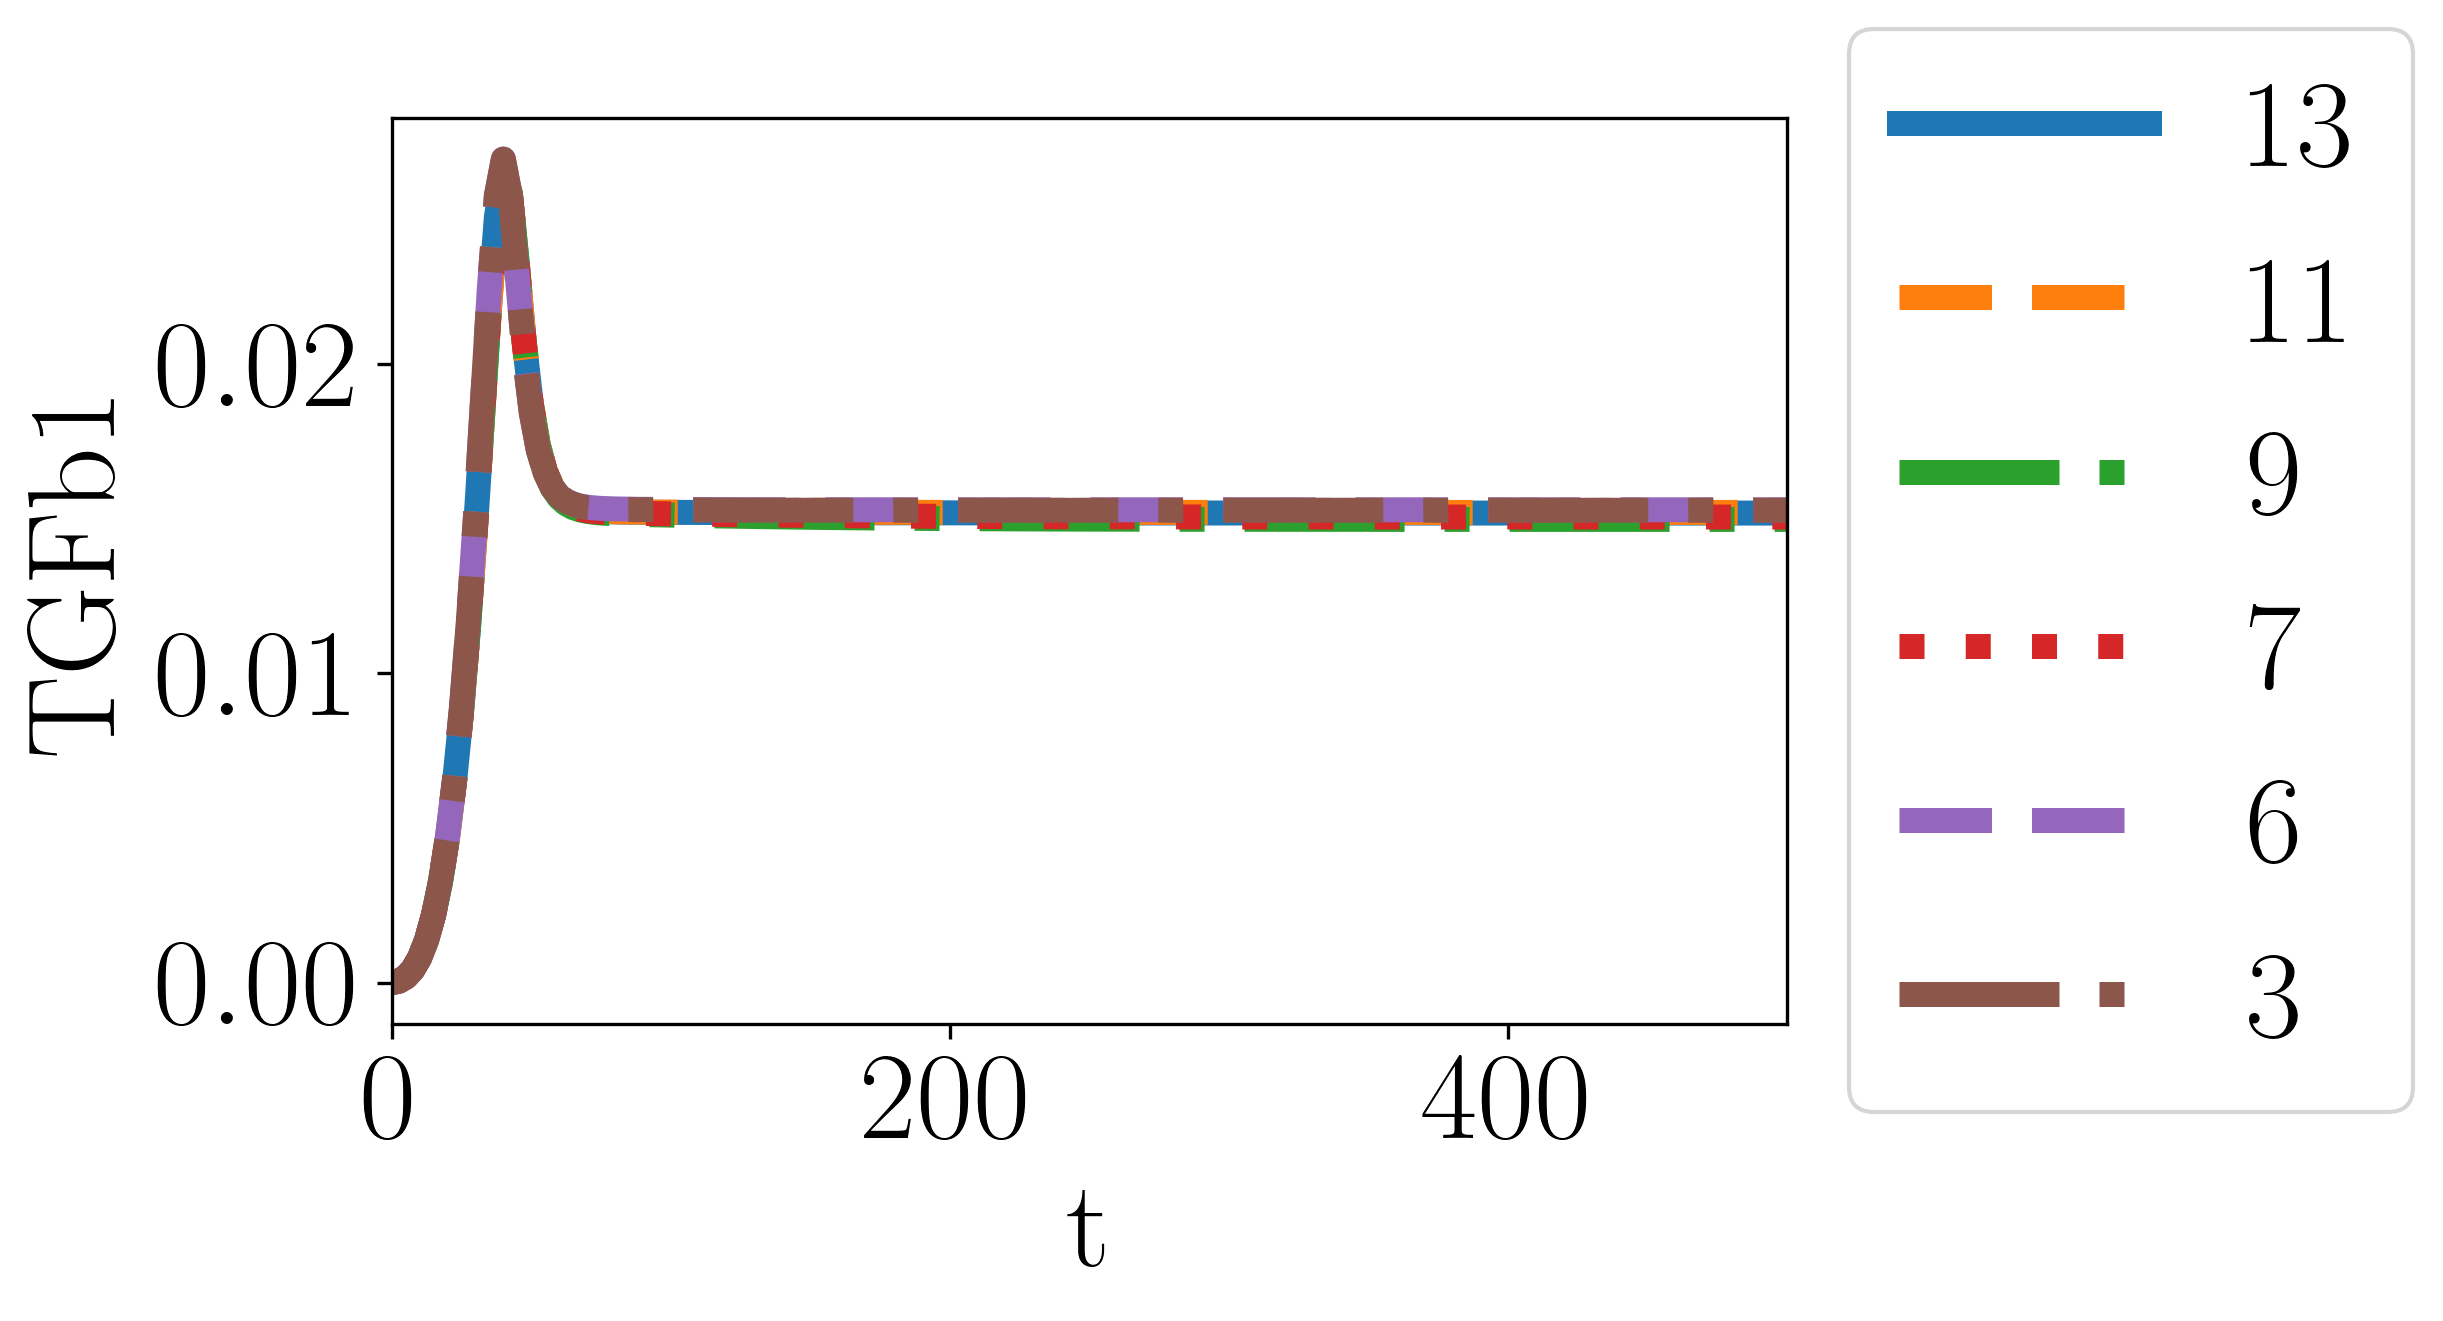

fixing time
Saving figure to /home/alexander/Dropbox/Approximate CLUE/2023-Extension/img/sims/BIOMD448_S6p.png


<Figure size 1200x1200 with 0 Axes>

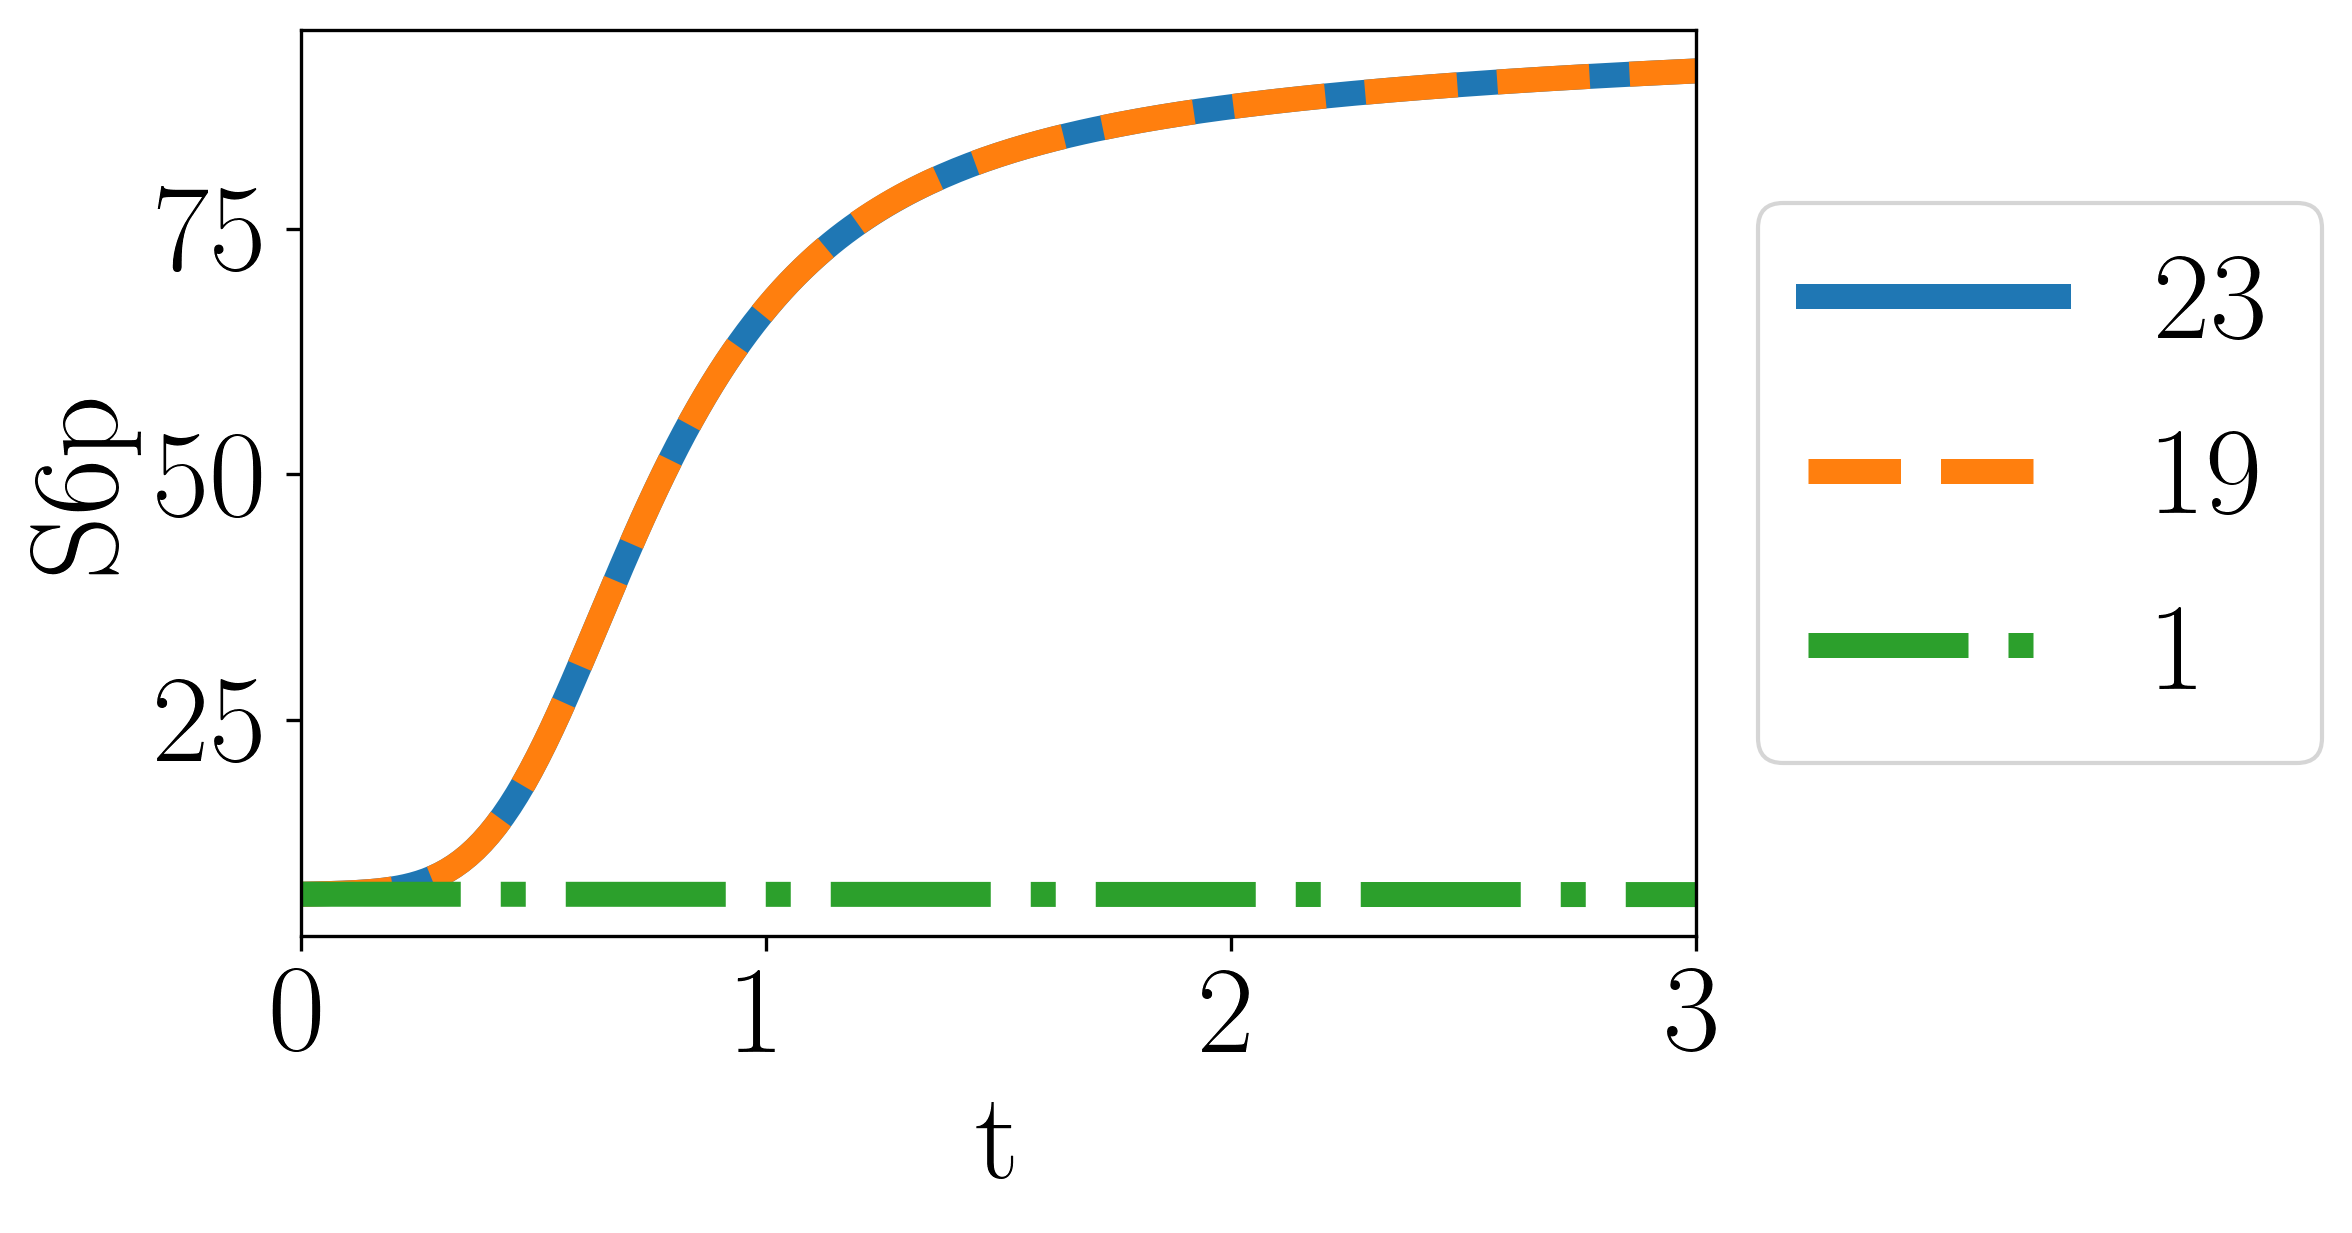

Saving figure to /home/alexander/Dropbox/Approximate CLUE/2023-Extension/img/sims/BIOMD488_Tau.png


<Figure size 1200x1200 with 0 Axes>

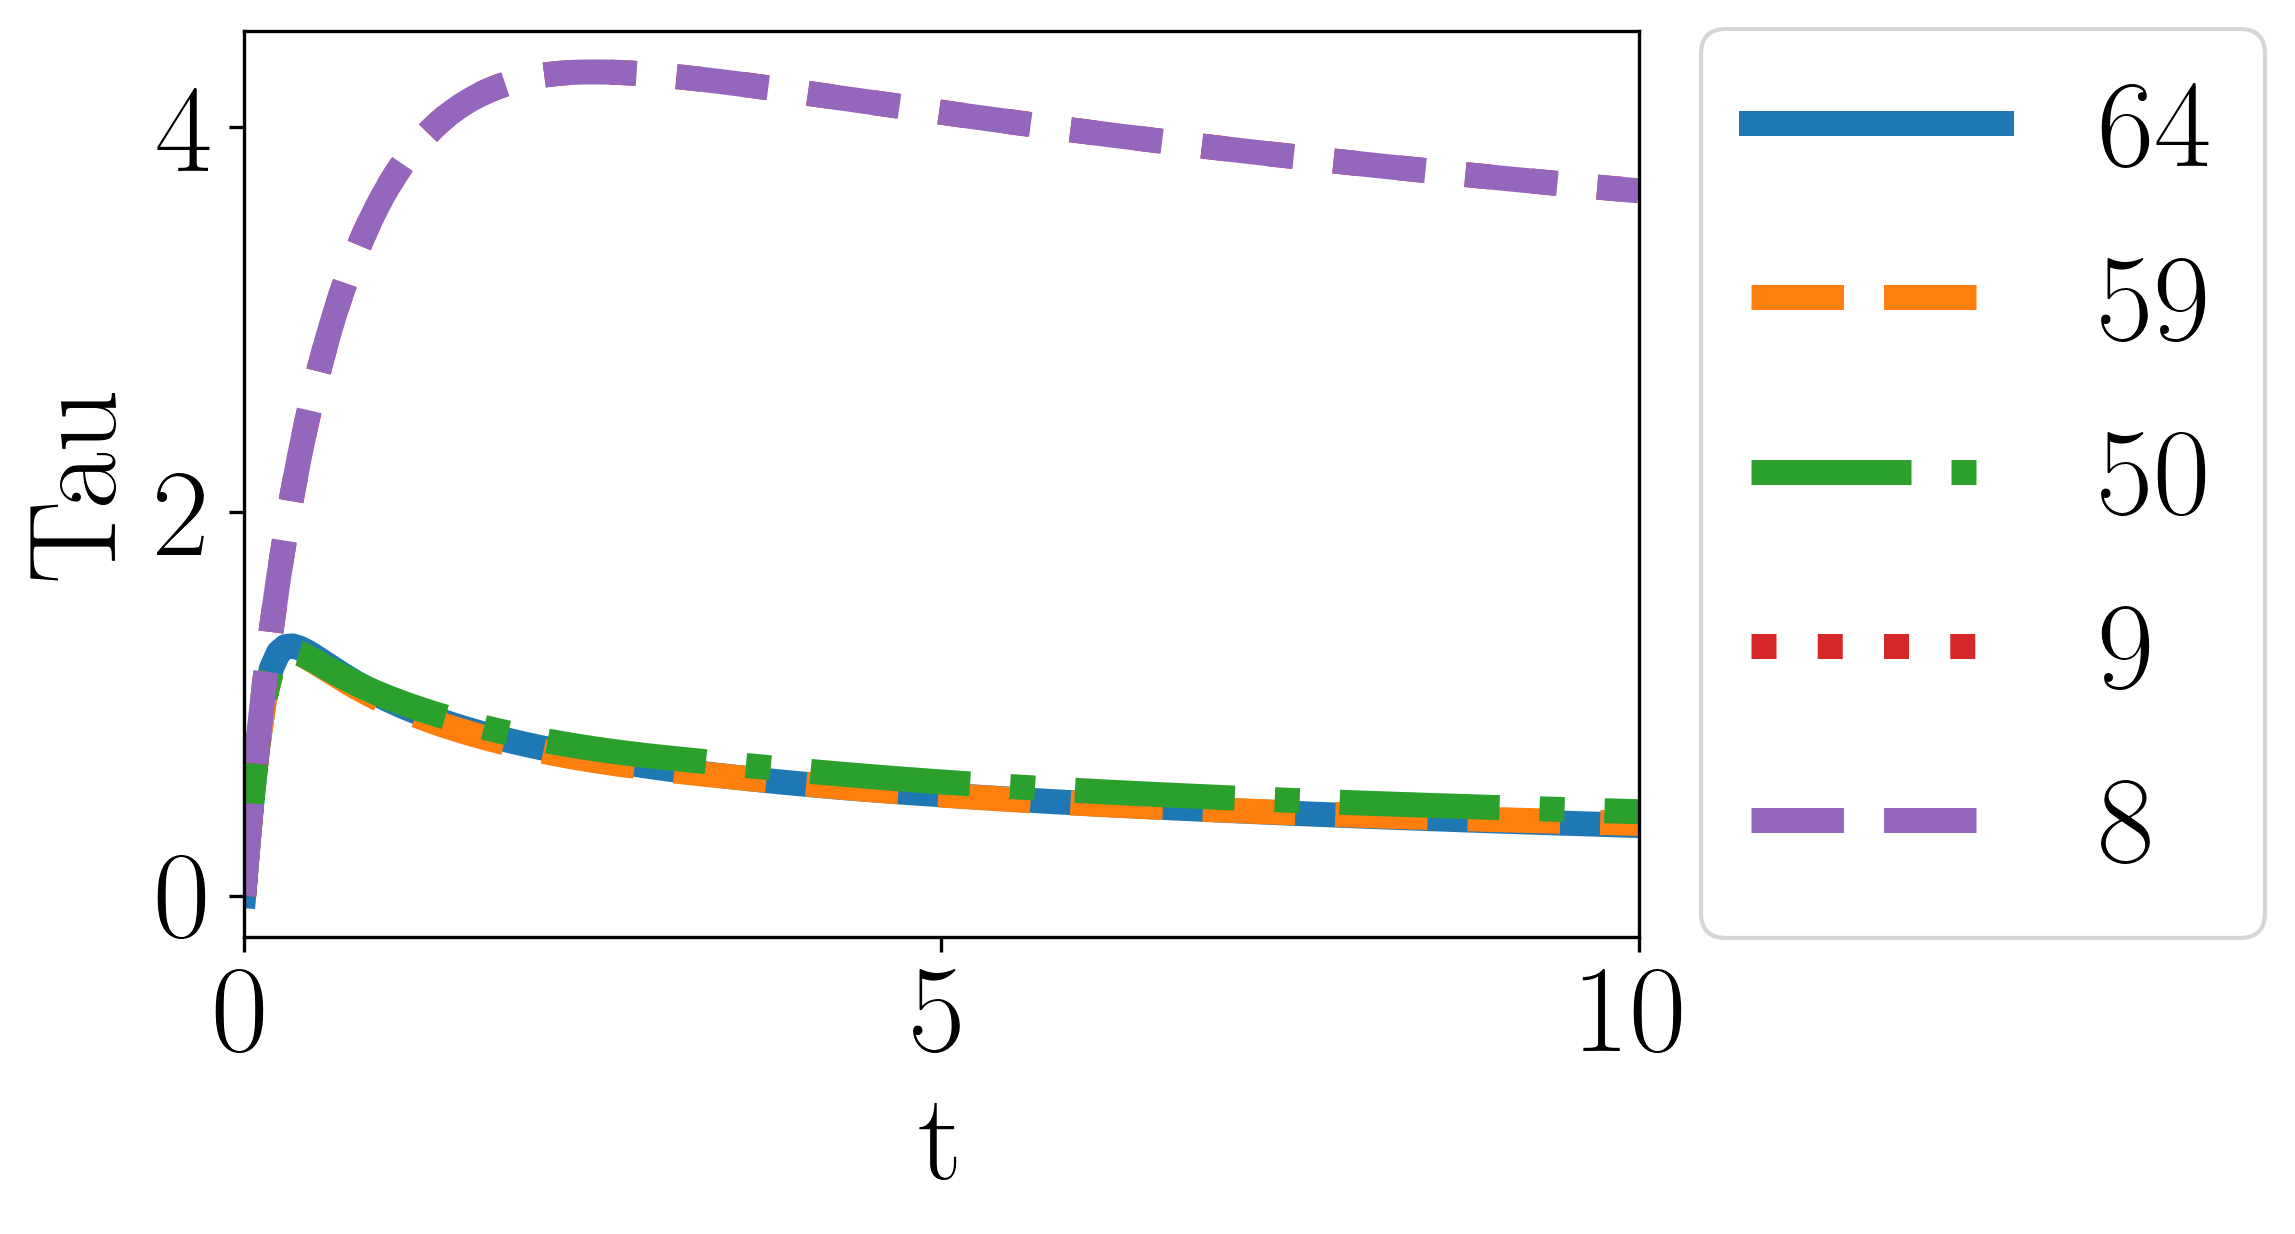

Saving figure to /home/alexander/Dropbox/Approximate CLUE/2023-Extension/img/sims/BIOMD634_Tau.png


<Figure size 1200x1200 with 0 Axes>

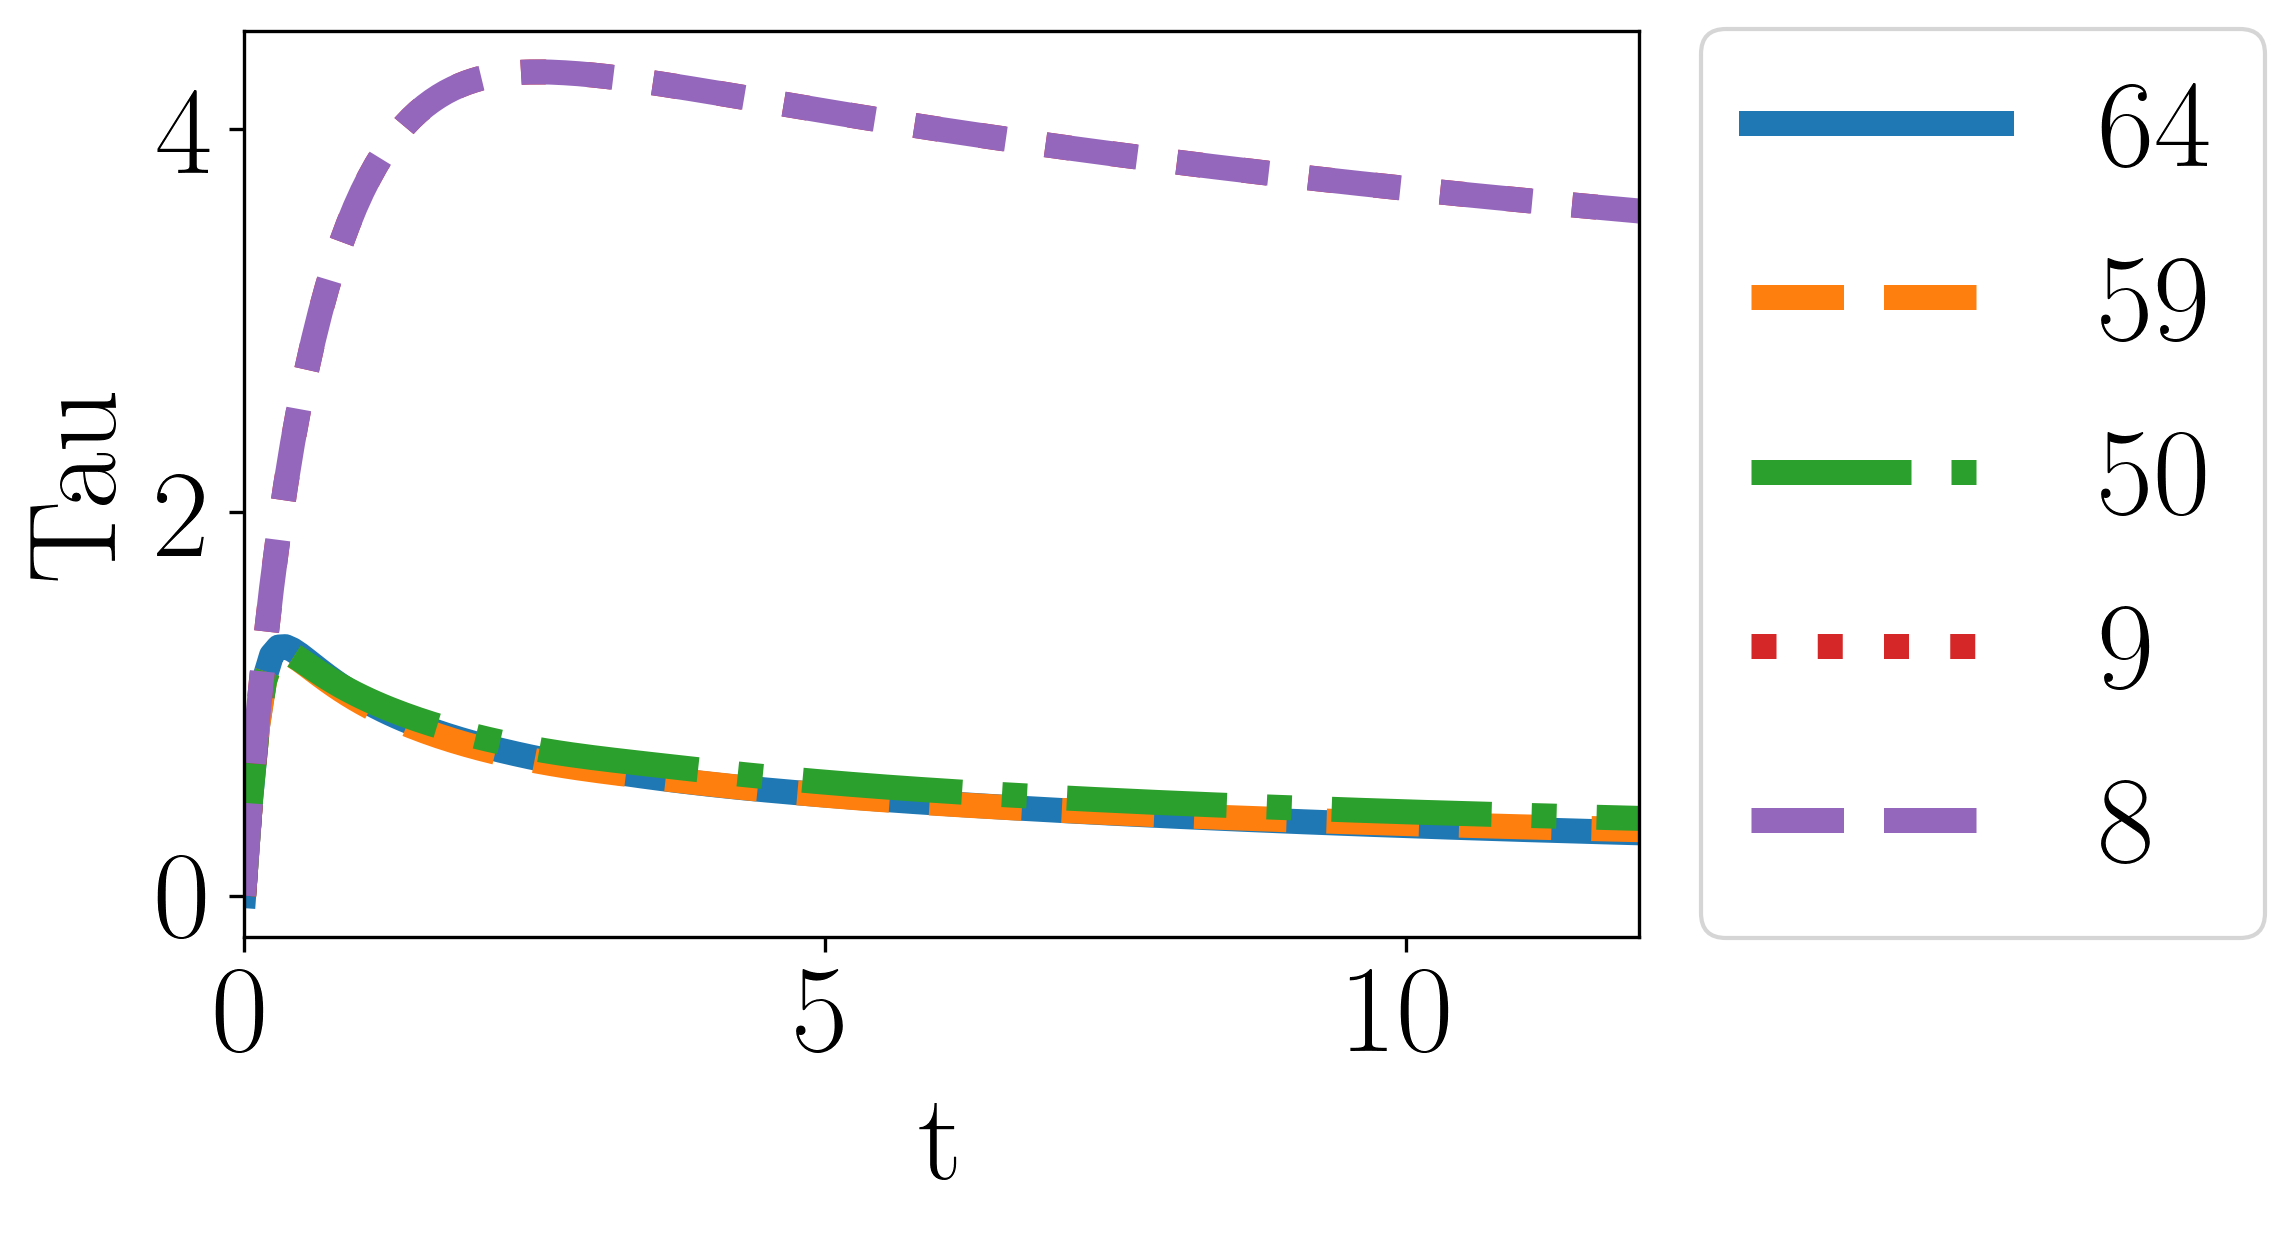

Saving figure to /home/alexander/Dropbox/Approximate CLUE/2023-Extension/img/sims/BioNetGen_CCP_D13PG.png


<Figure size 1200x1200 with 0 Axes>

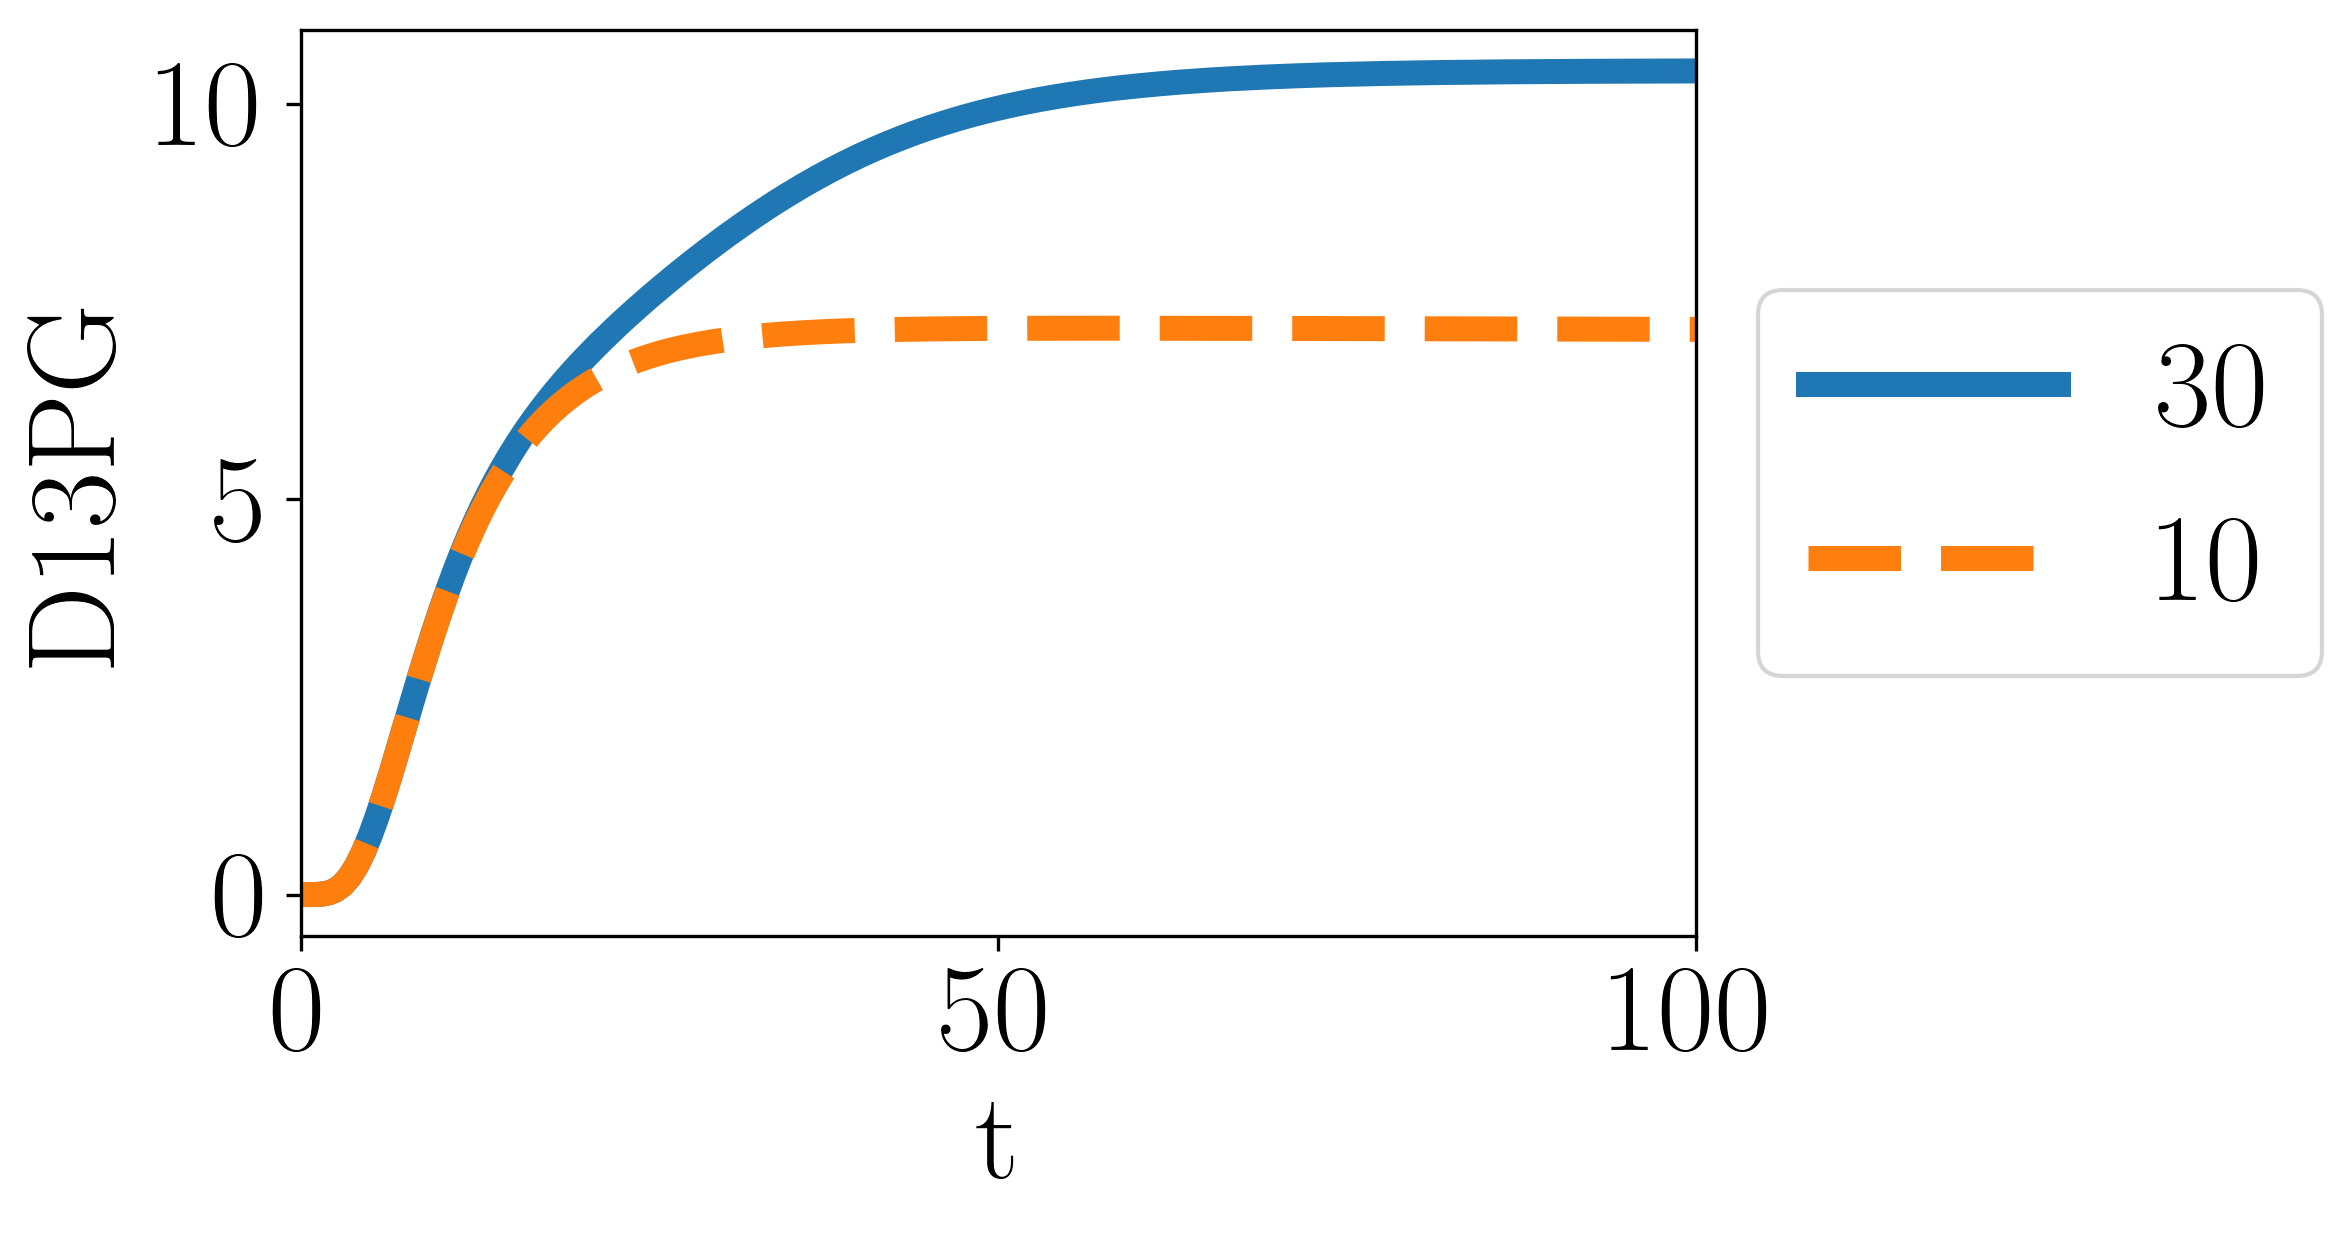

Saving figure to /home/alexander/Dropbox/Approximate CLUE/2023-Extension/img/sims/NIHMS80246_S6_S2P.png


<Figure size 1200x1200 with 0 Axes>

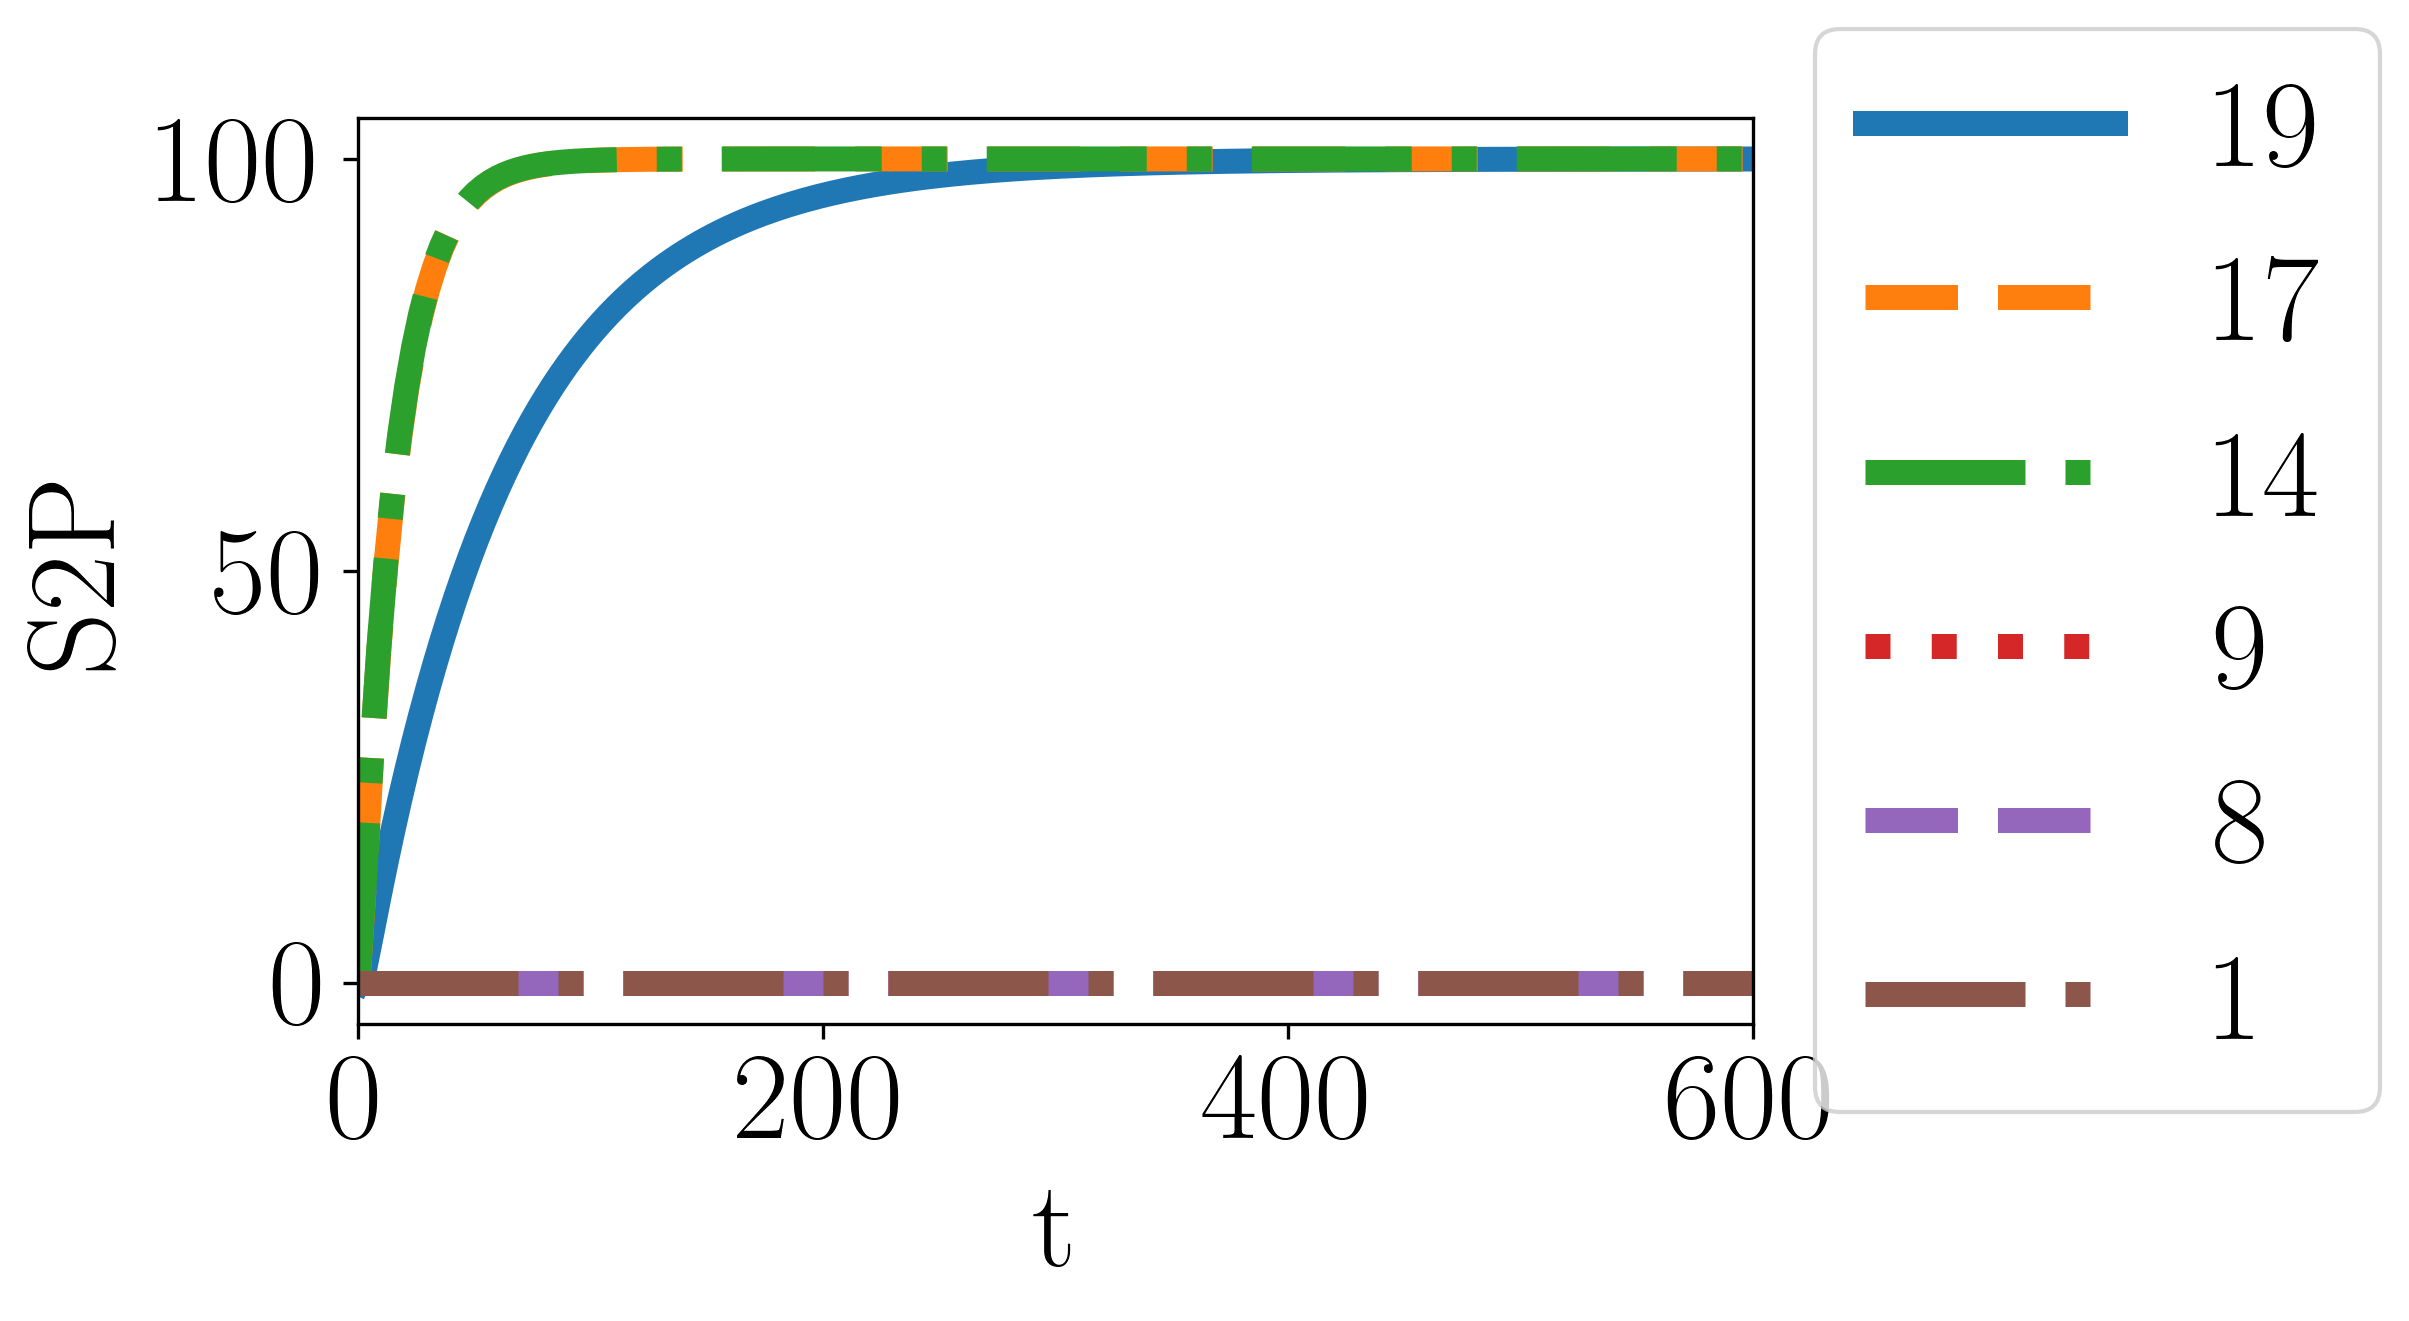

In [12]:
for model in dict_to_plot:
    plot_from_model(model, savefig=1)

<Figure size 1200x1200 with 0 Axes>

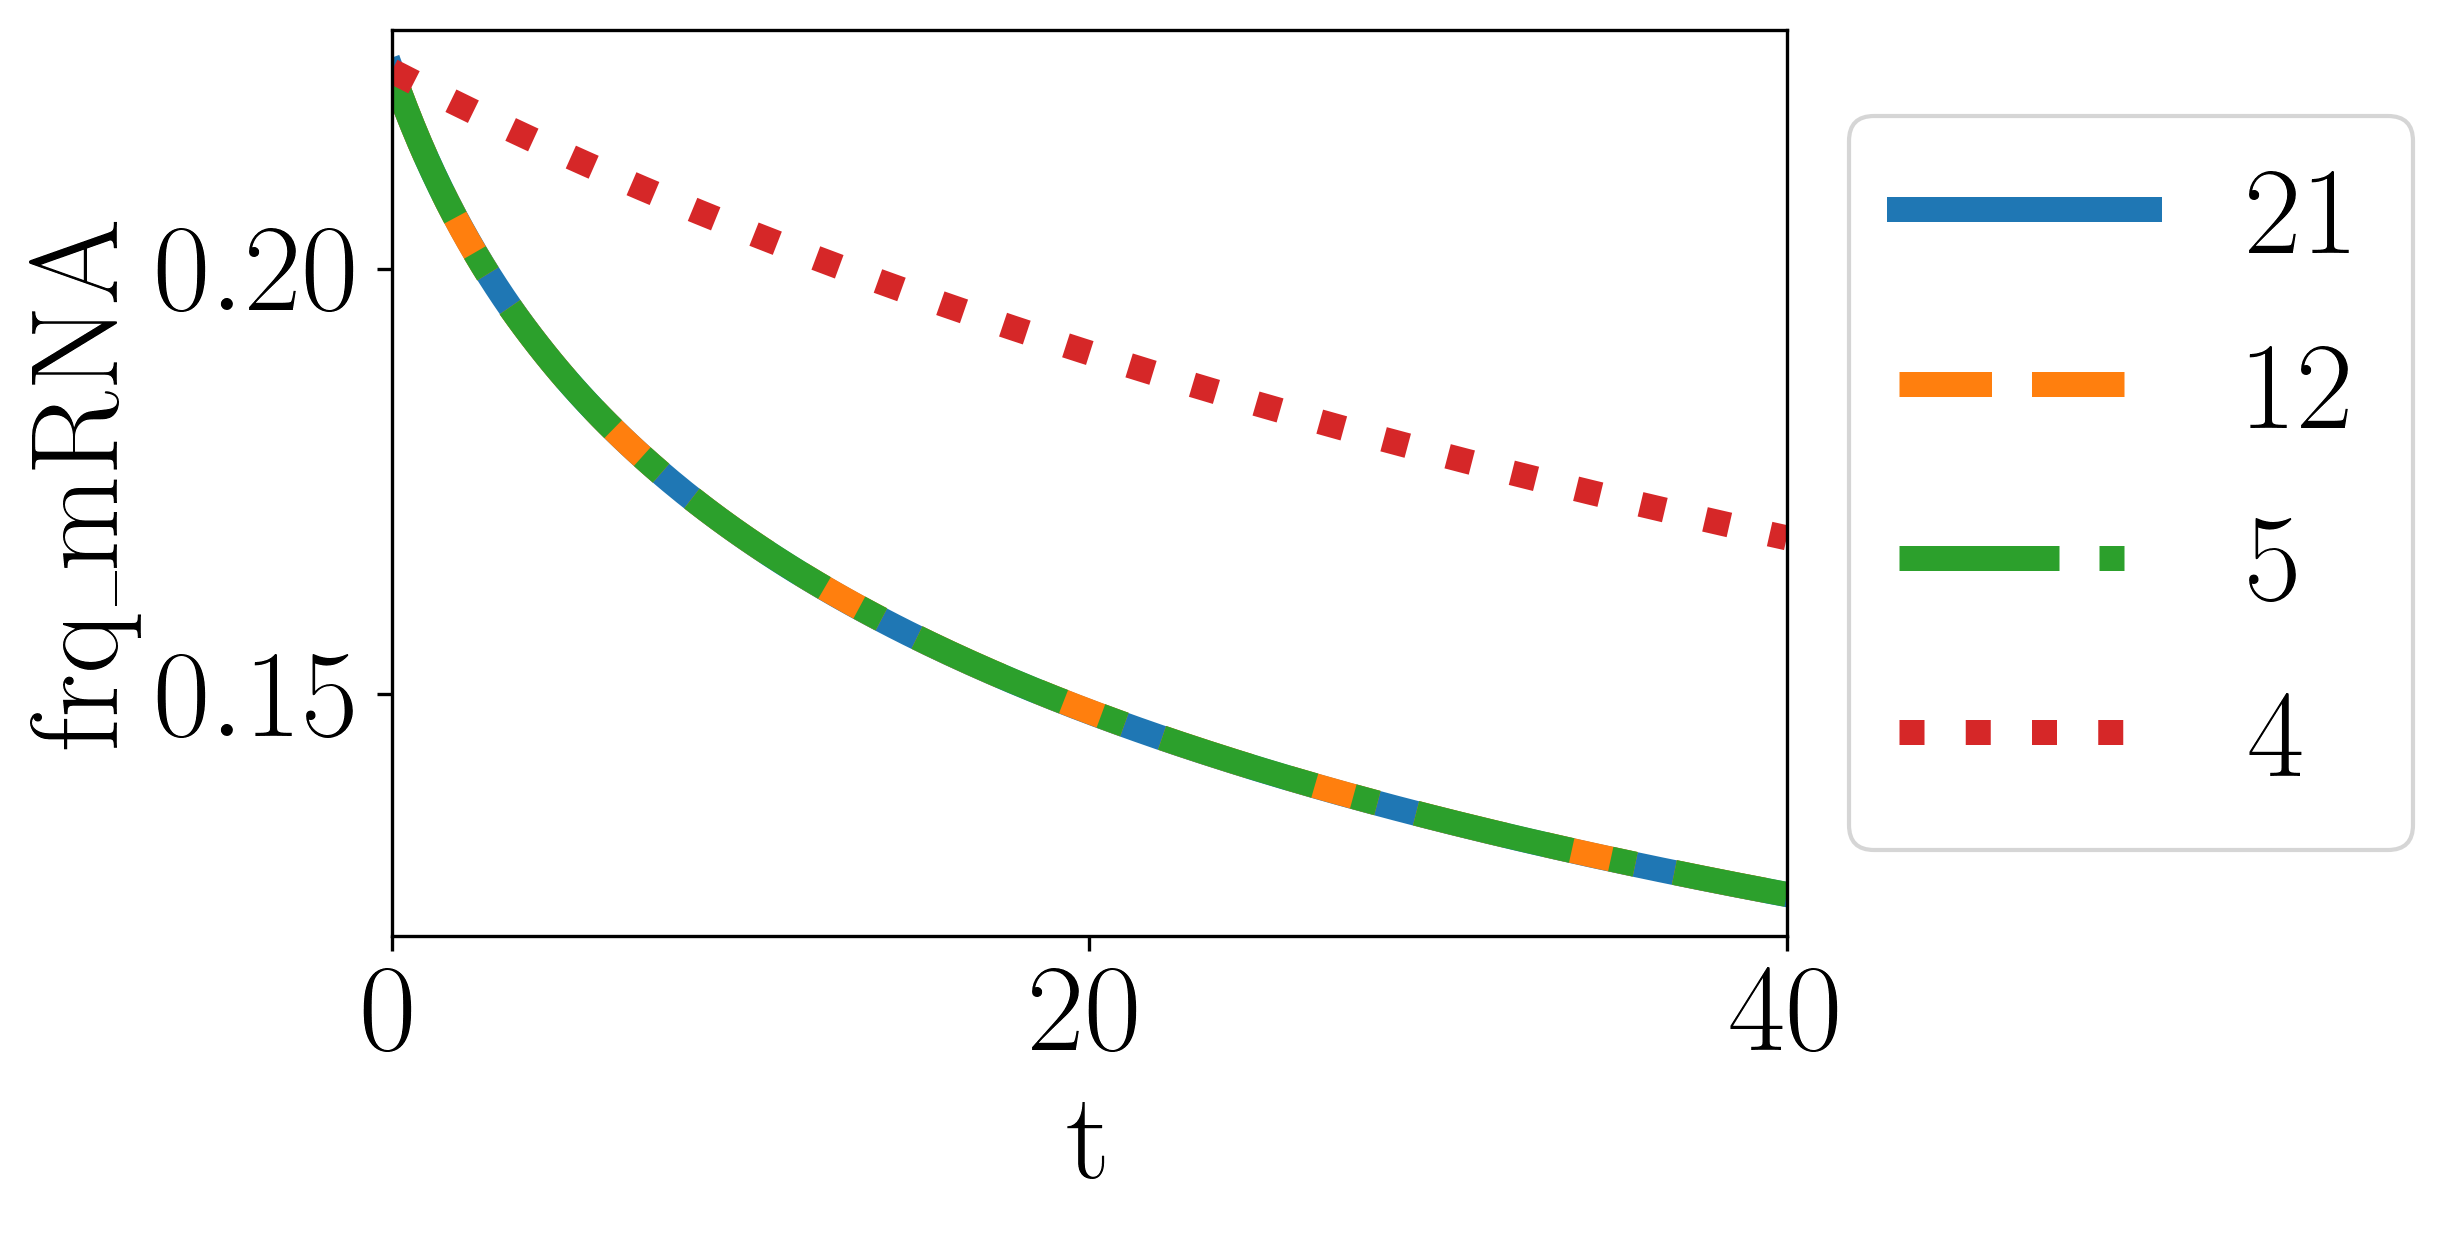

In [48]:
plot_from_model('BIOMD437')

fixing time


<Figure size 1200x1200 with 0 Axes>

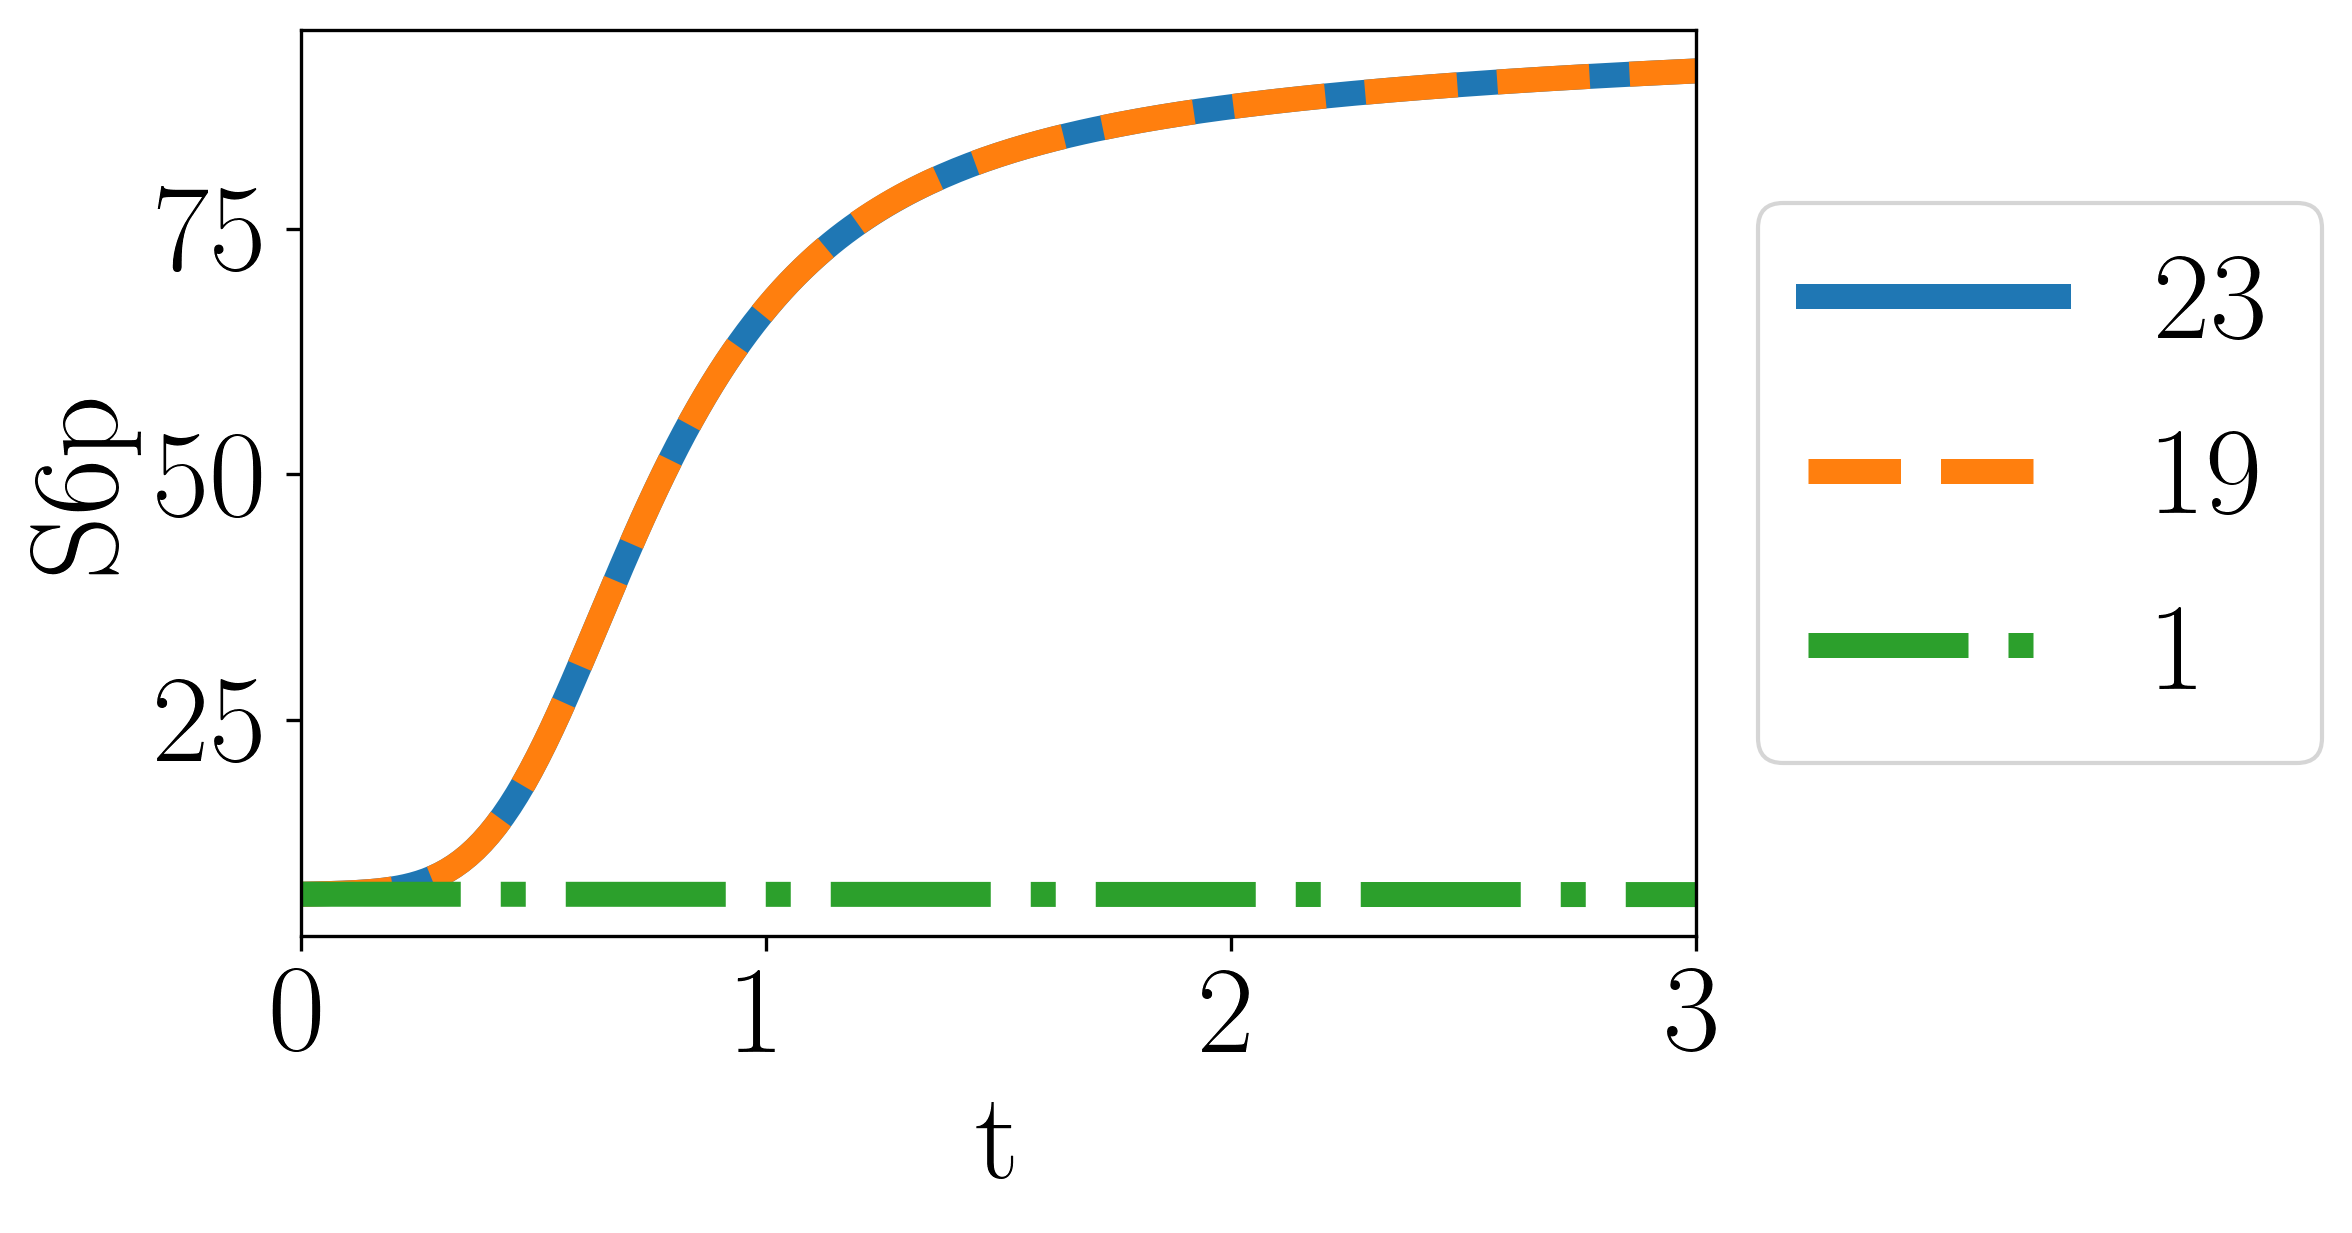

In [60]:
plot_from_model('BIOMD448')

<Figure size 1200x1200 with 0 Axes>

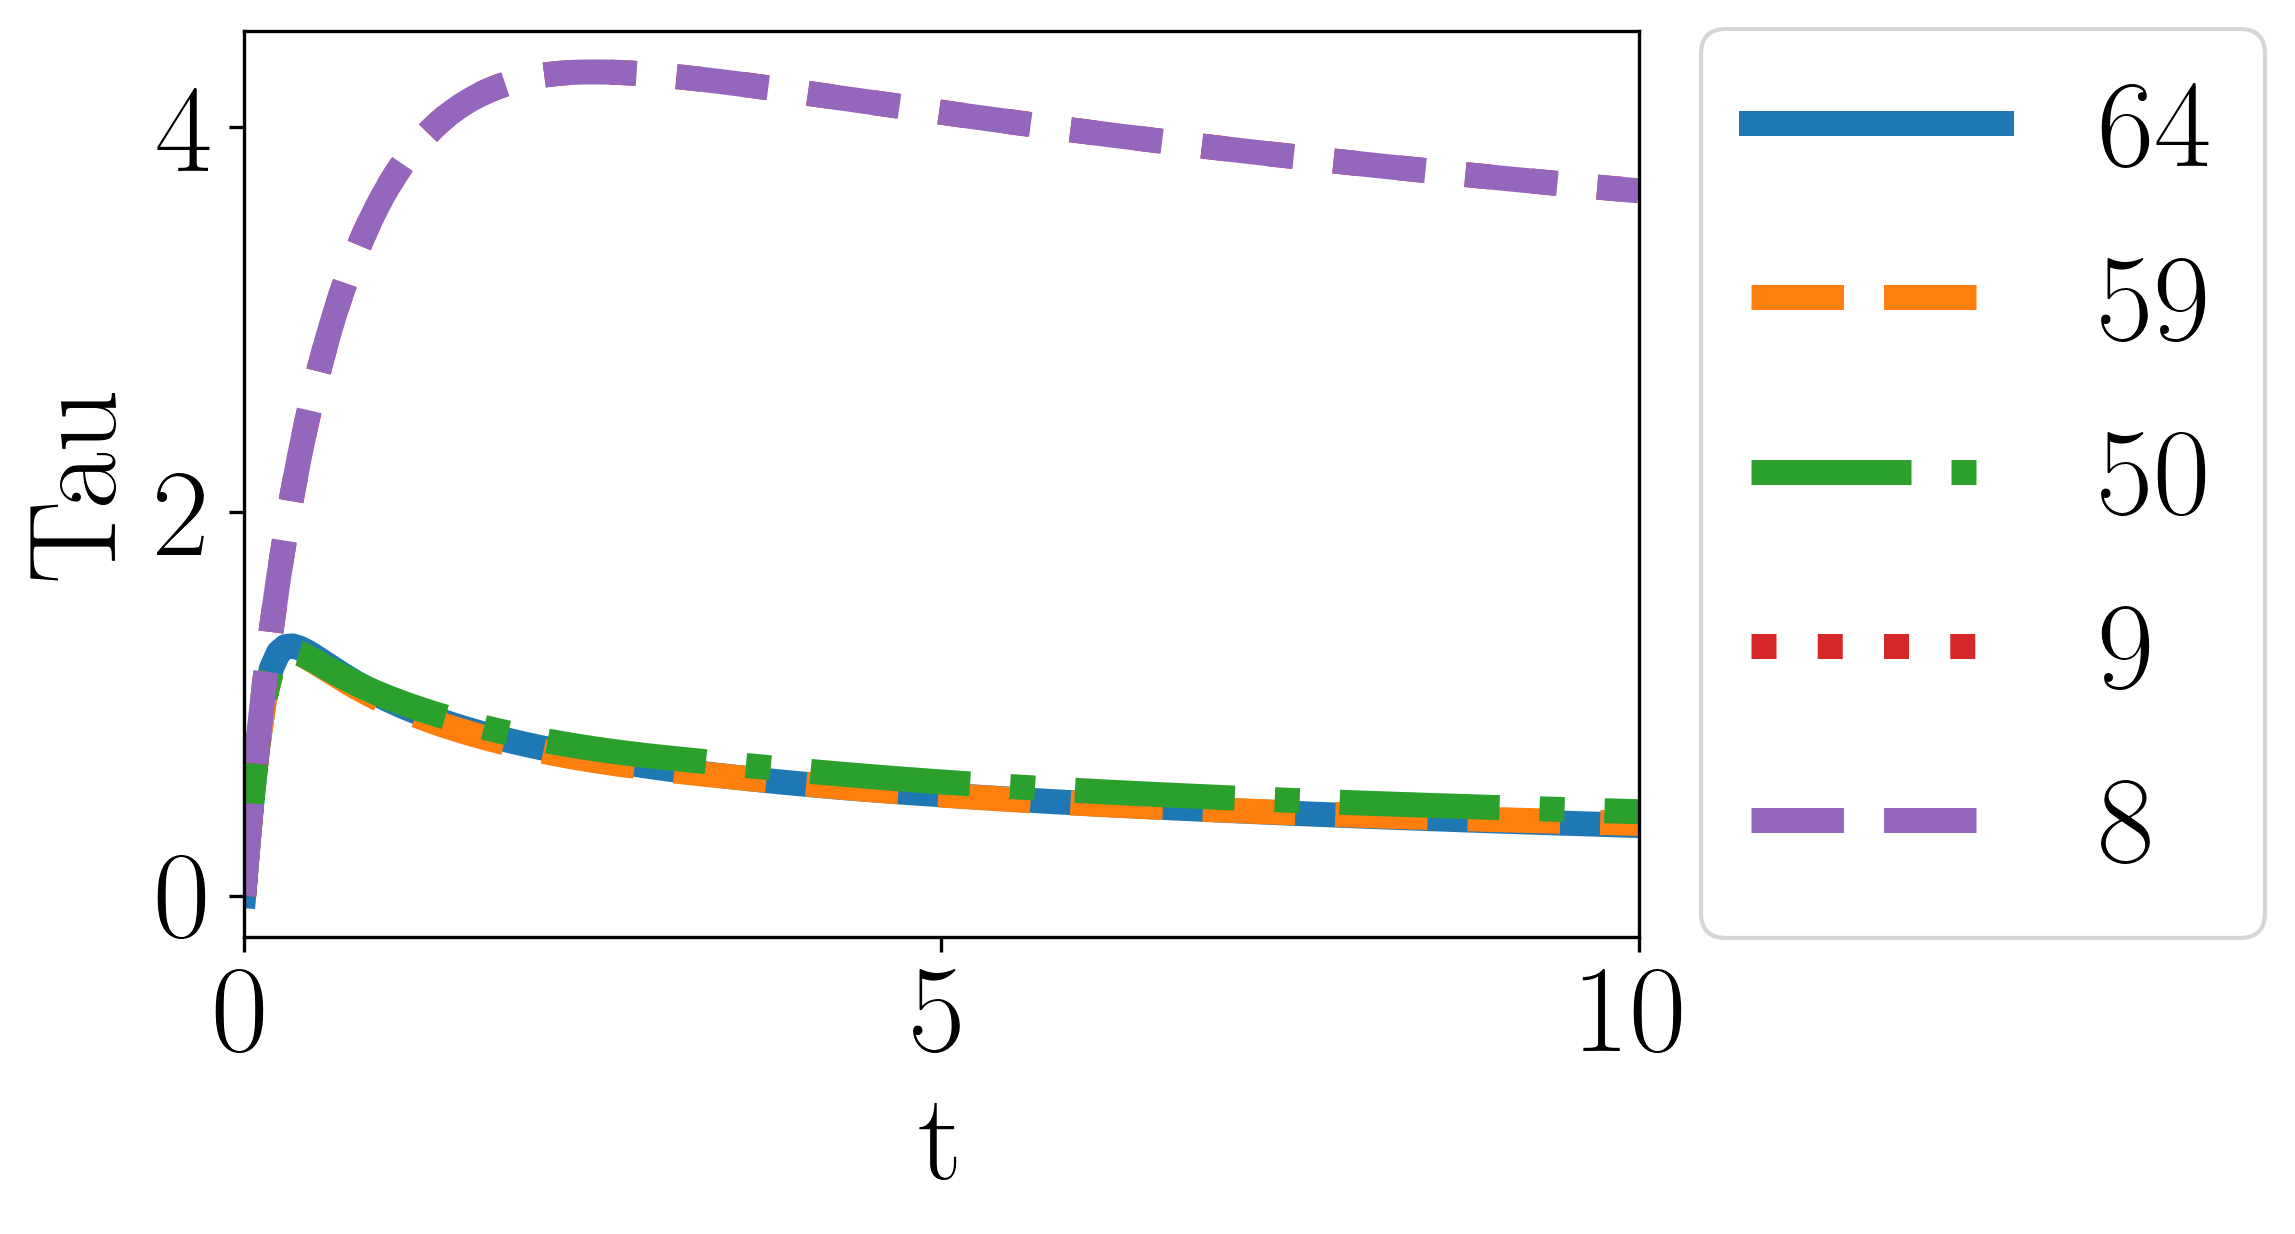

In [46]:
plot_from_model('BIOMD488')

Saving figure to /home/alexander/Dropbox/Approximate CLUE/2023-Extension/img/sims/IntroPlot_S2P.png


<Figure size 1200x1200 with 0 Axes>

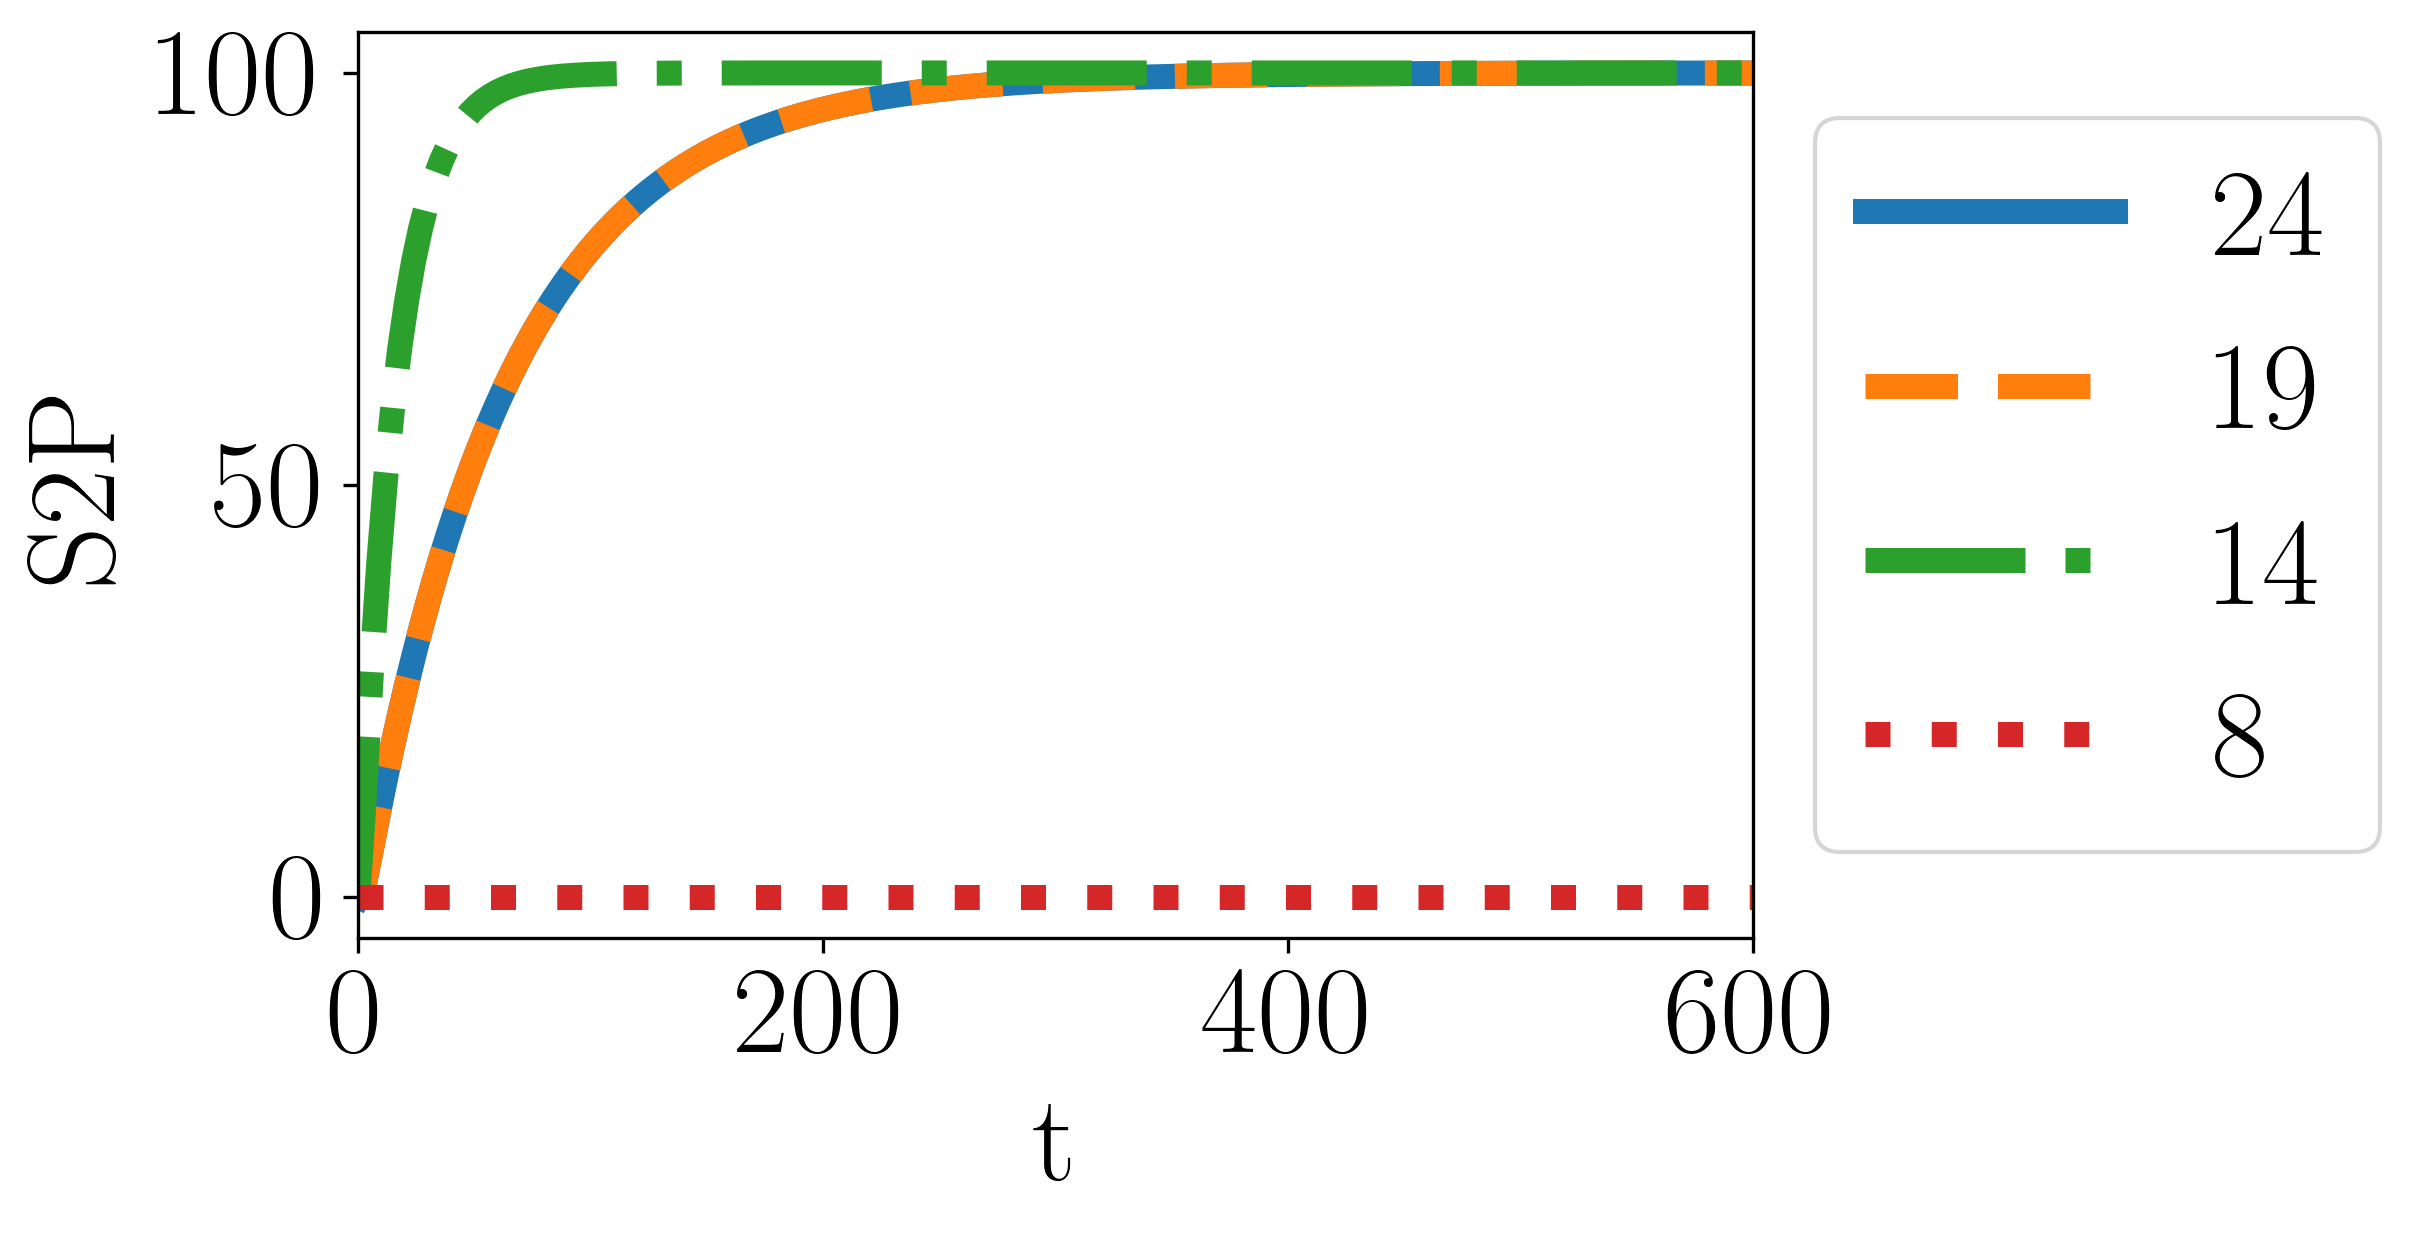

In [24]:
plot_from_model('IntroPlot', savefig=1)

## Escalability
In this section, we run all scalability results and make its respective table.

To run the experiments use the following command. Be aware that the models used are large and it can take hours to finish the computations

In [ ]:
%run phosphorylation.py 2 6 

Provided all results have been computed, the following cells obtain the summary table.

In [11]:
import pandas as pd
import json

all_results = []
for i in range(2,6):
    with open(f'/home/alexander/clue/exp_clue/results[{i}].json') as json_file:
        data = json.load(json_file)
        all_results.append(data)

df=pd.json_normalize(all_results) 

df["lumping_time"]= df["lumping_time"]/60
df["error_relative_T"]= df["error_relative_T"]*100
df.round(3)

,name,size,reduction_size,iterations,lumping_time,exact_sim_time,lumped_sim_time,error_T,error_relative_T,max_error
0,e2,24,5,21,0.056,0.116,0.042,0.018,2.630,0.274
1,e3,72,4,8,0.214,0.186,0.020,0.004,1.021,0.236
2,e4,264,4,8,8.024,1.429,0.032,0.001,0.266,0.208
3,e5,1032,4,8,371.683,13.303,0.025,0.001,0.626,0.199


In [ ]:
header = [
    "Sites",
    "Size",
    "Red. Size",
    "Iterations",
    "Lumping Time (min)",
    "Exact Sim.Time (s)",
    "Red. Sim.Time (s)",
    "$e(T)$",
    "$e_{rel}(T)$",
    "$max e$"]
out_path = '/home/alexander/Dropbox/Approximate CLUE/2023-Extension/table_large_exp.tex'
# out_path = '/home/alexander/table_large_exp.tex'
caption = 'Approximate lumpings on large models'
label = 'tab:large_exp'
df.to_latex(buf=out_path, caption=caption, label=label, float_format="%.3f", index=False)

# Example 

The following cells use an existing example to illustrate how the heuristic works to find a reduction given a expected output size.

In [26]:
import sys

sys.path.insert(0,"./../tests/numerical") # clue_example is here
sys.path.insert(0,"./../") # clue is here

from clue import *
from numerical_example import *
# import numerical_example as ne
from clue.numerical_domains import RR
import pandas as pd
import time
from alive_progress import alive_bar
from IPython.display import Image, display
import logging
import numpy as np
logger = logging.getLogger("clue")

def get_reductions(example, threshold=1e-12):
    system = FODESystem(file=example.path_model(), read_ic = True, parser=example.read).remove_parameters_ic()
    RRsystem = FODESystem(file=example.path_model(), read_ic = True, parser=example.read, field = RR).remove_parameters_ic()
    system = system.remove_parameters_ic()
    RRsystem = RRsystem.remove_parameters_ic()
    system.construct_matrices(example.matrix)
    RRsystem._lumping_matr[example.matrix] = tuple(M.change_base(RR) for M in system._lumping_matr[example.matrix]) 

    observables = {view_name : [SparsePolynomial.from_string(s, system.variables, system.field) for s in obs_set] for (view_name, obs_set) in example.observables.items()}
    final_observables = {}
    for (view_name,observable) in observables.items():
        if any(not obs.is_linear() for obs in observable):
            logger.error(f"The view ({view_name}) has a non-linear input. Skipping this example.")
        else:
            final_observables[view_name] = observable
    observables = final_observables

    if len(observables) == 0:
        logger.error(f"No valid observables found for this example. Finishing execution.")

    x0 = array([float(RRsystem.ic.get(v, 0)) for v in RRsystem.variables])
    norm_x0 = norm(x0, ord=2)
    num_points = 1
    threshold = 1e-4
    
    results = {}
    for observable in observables:
        result = []
        emax = RRsystem.find_maximal_threshold(observables[observable], "polynomial")
            
        nl,nr,ls,rs = RRsystem.find_next_reduction(observables[observable], threshold=threshold, matrix_algorithm=example.matrix)
        result.append((nl,nr,ls,rs))
        while nl != nr:
            nl,nr,ls,rs = RRsystem.find_next_reduction(observables[observable], threshold=threshold, matrix_algorithm=example.matrix, eps_min=rs)
            result.append((nl,nr,ls,rs))
            if nr == len(observables[observable]):
                print(abs(rs-emax)/emax)
                break
            
            
        results[observable] = result
    return results

In [27]:
example = get_example("BIOMD103")
results = get_reductions(example)
print(results['C3'])
emax = results['C3'][-1][3]
epsilons = np.array([-1]+[ x[2] for x in results['C3']])
emax = max(epsilons)
print(epsilons, emax)
sizes = np.array([17]+[ x[1] for x in results['C3']])
sizes[-1]=sizes[-2]

epsilons = epsilons/emax
# print(epsilons,sizes, emax)

0.0
[(23, 17, 0, 5.4965865206422654e-05), (17, 15, 0.0004337150301444288, 0.0004878220537070011), (15, 14, 0.0009612585098795086, 0.0010559458011140102), (14, 13, 0.0013636794976261402, 0.0014406129217541725), (13, 12, 0.0015704380749702275, 0.0016353506515782547), (12, 7, 0.0016353506515782547, 0.0016941776741292796), (8, 2, 0.001979121064610806, 0.0020361097427071114), (2, 1, 0.003425208771304554, 0.00351781537321105)]
[-1.00000000e+00  0.00000000e+00  4.33715030e-04  9.61258510e-04
  1.36367950e-03  1.57043807e-03  1.63535065e-03  1.97912106e-03
  3.42520877e-03] 0.003425208771304554
[-2.91953007e+02  0.00000000e+00  1.26624407e-01  2.80642312e-01
  3.98130330e-01  4.58494118e-01  4.77445540e-01  5.77810346e-01
  1.00000000e+00] [17 17 15 14 13 12  7  2  2] 0.003425208771304554


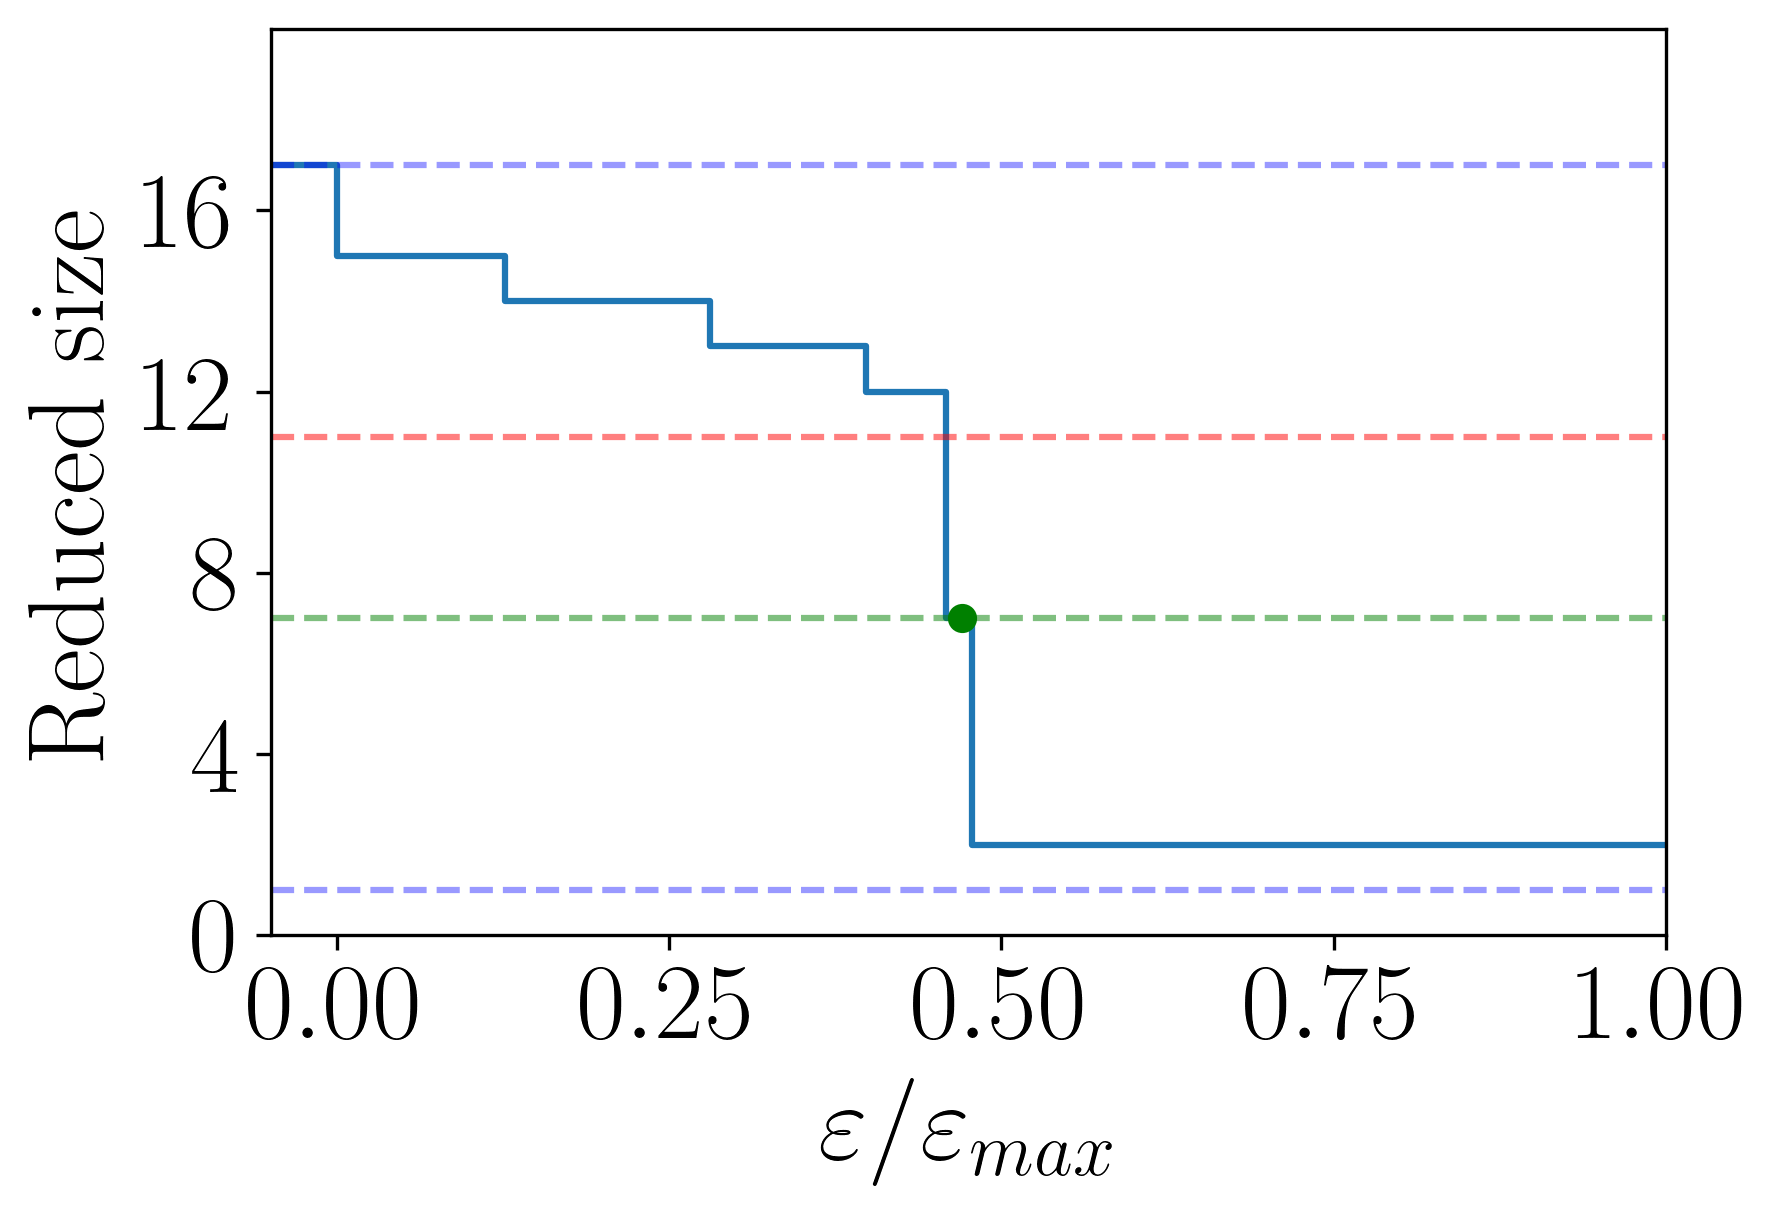

In [36]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 26
plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'stixsans'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

path = '/home/alexander/Dropbox/Approximate CLUE/2023-Extension/img/'

fig, ax1 = plt.subplots()
ax1.set_xlim([-0.05,1])
ax1.step(epsilons, sizes , label='Reduction Size')
ax1.set_xlabel(r'$\varepsilon/ \varepsilon_{max} $')
ax1.set_ylabel(r'Reduced size')
ax1.axhline(y=1, color='b', linestyle='--', alpha=0.4)
ax1.axhline(y=17, color='b', linestyle='--', alpha=0.4)
ax1.set_ylim([0,20])
ax1.set_yticks(np.arange(0, 20, step=4))
ax1.set_xticks(np.arange(0, 1.25, step=0.25))
name='staircase0.png'
plt.savefig(path+name, bbox_inches='tight',pad_inches=0.1)

ax1.axhline(y=11, color='r', linestyle='--', alpha=0.5)
# name='staircase1.png'
# plt.savefig(path+name, bbox_inches='tight',pad_inches=0.1)

# Point1
# mx = np.array([0.5, 0.5] )
# my = np.array([0,2 ])
# ax1.plot(mx,my, color='purple', alpha=0.4)
# ax1.scatter(0.5,2,zorder=10, c='green')
# name='staircase2.png'
# plt.savefig(path+name, bbox_inches='tight',pad_inches=0.1)

# Point 2
# ax1.scatter(0.25,14,zorder=10, c='green')
# mx = np.array([0.25, 0.25] )
# my = np.array([0,14 ])
# ax1.axvline(x=0.5, color='black', linestyle='--', alpha=0.5)
# ax1.plot(mx,my, color='purple', alpha=0.4)
# name='staircase3.png'
# plt.savefig(path+name, bbox_inches='tight',pad_inches=0.1)

# Last point
epaper = 1.61E-3/emax
ax1.scatter(epaper,7,zorder=10, c='green')
ax1.axhline(y=7, color='green', linestyle='--', alpha=0.5)
mx = np.array([epaper,epaper ] )
my = np.array([0,7 ])
name='staircasef.png'
plt.savefig(path+name, bbox_inches='tight',pad_inches=0.1)
# ax2.text(0.127005, 0.18415, r'$m$')